<a href="https://colab.research.google.com/github/javier-jaime/Tool-Crib/blob/master/Colab/PM4PY_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Notebook Prep

In [1]:
# Install pm4py the first time, comment/uncomment as required
!pip install pm4py

import pandas as pd
import pm4py
from google.colab import drive

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26094 sha256=4f298cbd5eab441d2affeee08cd449aae9390c64121353dba591a7dfb9609d82
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
  Created wheel for stringdist: filename=StringDist-1.0.9-cp310-cp310-linux_x86_64.whl size=16966 sha256=e6e9886a4bedc8993079d64c51c5e2608914e6be7705bb3b8f988af310dd808e
  Stored in directory: /root/.cache/pip/wheels/79/25/0a/4a0c2c7af31a8b473f6e10e30312396f31ae899722600d7b99
Successfully built intervaltree stringdist


In [2]:
# Option 1: Mount & Import Event Log from Google Drive, comment/uncomment as required
drive.mount('/content/drive')

path = 'drive/MyDrive/Colab Notebooks/Datasets/'

# Option 2: Upload Log to temporary session storage and import, comment/uncomment as required

# path = ''

Mounted at /content/drive


# 1. Handling Event Data

Process mining exploits Event Logs to generate knowledge of a process.
A wide variety of information systems, e.g., SAP, ORACLE, SalesForce, etc., allow us to extract, in one way or the other,
event logs similar to the example event logs.
All the examples we show in this notebook and all algorithms implemented in pm4py assume that we have already extracted
the event data into an appropriate event log format.
Hence, the core of pm4py does not support any data extraction features.

In order to support interoperability between different process mining tools and libraries, two standard data formats are
used to capture event logs, i.e., Comma Separated Value (CSV) files and eXtensible Event Stream (XES) files.
CSV files resemble the example tables shown in the previous section, i.e., Table 1 and Table 2. Each line in such a file
describes an event that occurred. The columns represent the same type of data, as shown in the examples, e.g., the case
for which the event occurred, the activity, the timestamp, the resource executing the activity, etc.
The XES file format is an XML-based format that allows us to describe process behavior.
We will not go into specific details w.r.t. the format of XES files, i.e., we refer to http://xes-standard.org/ for an
overview.

In this tutorial, we will use an oftenly used dummy example event log to explain the basic process mining operations.
The process that we are considering is a simplified process related to customer complaint handling, i.e., taken from the
book of van der Aalst (https://www.springer.com/de/book/9783662498507). The process, and the event data we are going to
use, looks as follows.

![Running example BPMN-based process model describing the behavior of the simple process that we use in this tutorial](https://github.com/pm4py/pm4py-core/blob/release/notebooks/img/bpmn_running_example.png?raw=1)

## Importing CSV Files

Let’s get started!
We have prepared a small sample event log, containing behavior similar equal to the process model in Figure 3.
You can find the sample event log (/running_example.csv).

We are going to load the event data, and, we are going to count how many cases are present in the event log, as well as
the number of events. Note that, for all this, we are effectively using a third-party library called pandas.
We do so because pandas is the de-facto standard of loading/manipulating csv-based data.
Hence, any process mining algorithm implemented in pm4py, using an event log as an input, can work directly with a
pandas file!


In [3]:
df = pd.read_csv(path +'running_example.csv', sep=';')
df

case_id            activity                  timestamp  costs org:resource
0         3    register request  2010-12-30 14:32:00+01:00     50         Pete
1         3    examine casually  2010-12-30 15:06:00+01:00    400         Mike
2         3        check ticket  2010-12-30 16:34:00+01:00    100        Ellen
3         3              decide  2011-01-06 09:18:00+01:00    200         Sara
4         3  reinitiate request  2011-01-06 12:18:00+01:00    200         Sara
5         3  examine thoroughly  2011-01-06 13:06:00+01:00    400         Sean
6         3        check ticket  2011-01-08 11:43:00+01:00    100         Pete
7         3              decide  2011-01-09 09:55:00+01:00    200         Sara
8         3    pay compensation  2011-01-15 10:45:00+01:00    200        Ellen
9         2    register request  2010-12-30 11:32:00+01:00     50         Mike
10        2        check ticket  2010-12-30 12:12:00+01:00    100         Mike
11        2    examine casually  2010-12-30 14:16:00+01:00    400         Sean
12        2              decide  2011-01-05 11:22:00+01:00    200         Sara
13        2    pay compensation  2011-01-08 12:05:00+01:00    200        Ellen
14        1    register request  2010-12-30 11:02:00+01:00     50         Pete
15        1  examine thoroughly  2010-12-31 10:06:00+01:00    400          Sue
16        1        check ticket  2011-01-05 15:12:00+01:00    100         Mike
17        1              decide  2011-01-06 11:18:00+01:00    200         Sara
18        1      reject request  2011-01-07 14:24:00+01:00    200         Pete
19        6    register request  2011-01-06 15:02:00+01:00     50         Mike
20        6    examine casually  2011-01-06 16:06:00+01:00    400        Ellen
21        6        check ticket  2011-01-07 16:22:00+01:00    100         Mike
22        6              decide  2011-01-07 16:52:00+01:00    200         Sara
23        6    pay compensation  2011-01-16 11:47:00+01:00    200         Mike
24        5    register request  2011-01-06 09:02:00+01:00     50        Ellen
25        5    examine casually  2011-01-07 10:16:00+01:00    400         Mike
26        5        check ticket  2011-01-08 11:22:00+01:00    100         Pete
27        5              decide  2011-01-10 13:28:00+01:00    200         Sara
28        5  reinitiate request  2011-01-11 16:18:00+01:00    200         Sara
29        5        check ticket  2011-01-14 14:33:00+01:00    100        Ellen
30        5    examine casually  2011-01-16 15:50:00+01:00    400         Mike
31        5              decide  2011-01-19 11:18:00+01:00    200         Sara
32        5  reinitiate request  2011-01-20 12:48:00+01:00    200         Sara
33        5    examine casually  2011-01-21 09:06:00+01:00    400          Sue
34        5        check ticket  2011-01-21 11:34:00+01:00    100         Pete
35        5              decide  2011-01-23 13:12:00+01:00    200         Sara
36        5      reject request  2011-01-24 14:56:00+01:00    200         Mike
37        4    register request  2011-01-06 15:02:00+01:00     50         Pete
38        4        check ticket  2011-01-07 12:06:00+01:00    100         Mike
39        4  examine thoroughly  2011-01-08 14:43:00+01:00    400         Sean
40        4              decide  2011-01-09 12:02:00+01:00    200         Sara
41        4      reject request  2011-01-12 15:44:00+01:00    200        Ellen

Let's inspect the small event log.
The first line (i.e., row) specifies the name of each column (i.e., event attribute).
Observe that, in the data table described by the file, we have 5 columns, being: *case_id*, *activity*,
*timestamp*, *costs* and *org:resource*.
The first column represents the *case identifier*, i.e., allowing us to identify what activity has been logged in the
context of what instance of the process.
The second column (*activity*) records the activity that has been performed.
The third column shows at what point in time the activity was recorded (*timestamp*).
In this example data, additional information is present as well.
In this case, the fourth column tracks the costs of the activity (*costs* attribute), whereas the fifth row tracks what
resource has performed the activity (*org:resource*).

Observe that, row 2-10 show the events that have been recorded for the process identified by *case identifier* 3.
We observe that first a register request activity was performed, followed by the examine casually, check ticket, decide,
reinitiate request, examine thoroughly, check ticket,decide, and finally, pay compensation activities.
Note that, in this case, the recorded process instance behaves as described by the model depicted in Figure 3.

Let's investigate some basic statistics of our log, e.g., the total number of cases described and the total number of events.

In [4]:
# number of cases
len(df['case_id'].unique())

6

In [5]:
# number of events
len(df)


42

### Formatting Data Frames

Now we have loaded our first event log, it is time to put some pm4py into the mix.
pm4py uses standardized column names to represent the *case identifier*, the *activity name* and the timstamp.
These are, respectively, ```case:concept:name```, ```concept:name``` and ```time:timestamp```.
Hence, to make pm4py work with the provided csv file, we need to rename the ```case_id```, ```activity``` and ```timestamp``` columns.
pm4py provides a dedicated utility function for this:

In [6]:
log = pm4py.format_dataframe(df, case_id='case_id',activity_key='activity',
                             timestamp_key='timestamp')
log


case_id            activity                 timestamp  costs org:resource  \
0         1    register request 2010-12-30 10:02:00+00:00     50         Pete   
1         1  examine thoroughly 2010-12-31 09:06:00+00:00    400          Sue   
2         1        check ticket 2011-01-05 14:12:00+00:00    100         Mike   
3         1              decide 2011-01-06 10:18:00+00:00    200         Sara   
4         1      reject request 2011-01-07 13:24:00+00:00    200         Pete   
5         2    register request 2010-12-30 10:32:00+00:00     50         Mike   
6         2        check ticket 2010-12-30 11:12:00+00:00    100         Mike   
7         2    examine casually 2010-12-30 13:16:00+00:00    400         Sean   
8         2              decide 2011-01-05 10:22:00+00:00    200         Sara   
9         2    pay compensation 2011-01-08 11:05:00+00:00    200        Ellen   
10        3    register request 2010-12-30 13:32:00+00:00     50         Pete   
11        3    examine casually 2010-12-30 14:06:00+00:00    400         Mike   
12        3        check ticket 2010-12-30 15:34:00+00:00    100        Ellen   
13        3              decide 2011-01-06 08:18:00+00:00    200         Sara   
14        3  reinitiate request 2011-01-06 11:18:00+00:00    200         Sara   
15        3  examine thoroughly 2011-01-06 12:06:00+00:00    400         Sean   
16        3        check ticket 2011-01-08 10:43:00+00:00    100         Pete   
17        3              decide 2011-01-09 08:55:00+00:00    200         Sara   
18        3    pay compensation 2011-01-15 09:45:00+00:00    200        Ellen   
19        4    register request 2011-01-06 14:02:00+00:00     50         Pete   
20        4        check ticket 2011-01-07 11:06:00+00:00    100         Mike   
21        4  examine thoroughly 2011-01-08 13:43:00+00:00    400         Sean   
22        4              decide 2011-01-09 11:02:00+00:00    200         Sara   
23        4      reject request 2011-01-12 14:44:00+00:00    200        Ellen   
24        5    register request 2011-01-06 08:02:00+00:00     50        Ellen   
25        5    examine casually 2011-01-07 09:16:00+00:00    400         Mike   
26        5        check ticket 2011-01-08 10:22:00+00:00    100         Pete   
27        5              decide 2011-01-10 12:28:00+00:00    200         Sara   
28        5  reinitiate request 2011-01-11 15:18:00+00:00    200         Sara   
29        5        check ticket 2011-01-14 13:33:00+00:00    100        Ellen   
30        5    examine casually 2011-01-16 14:50:00+00:00    400         Mike   
31        5              decide 2011-01-19 10:18:00+00:00    200         Sara   
32        5  reinitiate request 2011-01-20 11:48:00+00:00    200         Sara   
33        5    examine casually 2011-01-21 08:06:00+00:00    400          Sue   
34        5        check ticket 2011-01-21 10:34:00+00:00    100         Pete   
35        5              decide 2011-01-23 12:12:00+00:00    200         Sara   
36        5      reject request 2011-01-24 13:56:00+00:00    200         Mike   
37        6    register request 2011-01-06 14:02:00+00:00     50         Mike   
38        6    examine casually 2011-01-06 15:06:00+00:00    400        Ellen   
39        6        check ticket 2011-01-07 15:22:00+00:00    100         Mike   
40        6              decide 2011-01-07 15:52:00+00:00    200         Sara   
41        6    pay compensation 2011-01-16 10:47:00+00:00    200         Mike   

   case:concept:name        concept:name            time:timestamp  @@index  \
0                  1    register request 2010-12-30 10:02:00+00:00        0   
1                  1  examine thoroughly 2010-12-31 09:06:00+00:00        1   
2                  1        check ticket 2011-01-05 14:12:00+00:00        2   
3                  1              decide 2011-01-06 10:18:00+00:00        3   
4                  1      reject request 2011-01-07 13:24:00+00:00        4   
5                  2    register request 2010-

Observe that the column names are updated as expected.

Let us assume that we are not only interested in the number of events and cases, yet, we also want to figure out what
activities occur first, and what activities occur last in the traces described by the event log.
pm4py has a specific built-in function for this, i.e., ```pm4py.get_start_activities()``` and ```pm4py.get_end_activities()``` respectively.

In [7]:
pm4py.get_start_activities(log)

{'register request': 6}

In [8]:
pm4py.get_end_activities(log)

{'reject request': 3, 'pay compensation': 3}

The ```pm4py.get_start_activities()``` and ```pm4py.get_end_activities()``` both return a dictionary containing the activities
as a key, and, the number of observations (i.e., number of traces in which they occur first, respectively, last) in
the event log.

pm4py exploits a built-in pandas function to detect the format of the timestamps in the input data automatically.
However, pandas looks at the timestamp values in each row in isolation.
In some cases, this can lead to problems.
For example, if the provided value is 2020-01-18, i.e., first the year, then the month, and then the day of the date,
in some cases, a value of 2020-02-01 may be interpreted wrongly as January 2nd, i.e., rather than February 1st.
To alleviate this problem, an additional parameter can be provided to the ```format_dataframe()``` method, i.e.,
the timest_format parameter. The default Python timestamp format codes can be used to provide the timestamp format.
In this example, the timestamp format is ```%Y-%m-%d %H:%M:%S%z```.
In general, we advise to always specify the timestamp format.

## Importing XES Files

Next to CSV files, event data can also be stored in an XML-based format, i.e., in XES files.
In an XES file, we can describe a containment relation, i.e., a log contains a number of traces, which in turn contain several events.
Furthermore, an object, i.e., a log, trace, or event, is allowed to have attributes.
The advantage is that certain data attributes that are constant for a log or a trace, can be stored at that level.
For example, assume that we only know the total costs of a case, rather than the costs of the individual events.
If we want to store this information in a CSV file, we either need to replicate this information (i.e., we can only
store data in rows, which directly refer to events), or, we need to explicitly define that certain columns only get a
value once, i.e., referring to case-level attributes.
The XES standard more naturally supports the storage of this type of information.

Importing an XES file is fairly straightforward.
pm4py has a special read_xes() function that can parse a given xes file and load it in pm4py, i.e., as an Event Log object.
Consider the following code snippet, in which we show how to import an XES event log.
Like the previous example, the script outputs activities that can start and end a trace.

In [9]:
log_xes = pm4py.read_xes(path +'running_example.xes', return_legacy_log_object=True)
pm4py.get_start_activities(log_xes)

/usr/local/lib/python3.10/dist-packages/pm4py/util/dt_parsing/parser.py:76: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pm4py/utils.py:494: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


{'register request': 6}

In [10]:
pm4py.get_end_activities(log_xes)


{'pay compensation': 3, 'reject request': 3}

## Exporting Event Data

Now we have seen how to import event data into pm4py, let’s take a look at the opposite, i.e., exporting event data.
Exporting of event logs can be very useful, e.g., we might want to convert a .csv file into a ```.xes``` file or we might
want to filter out certain (noisy) cases and save the filtered event log. Like importing, exporting of event data is
possible in two ways, i.e., exporting to ```csv``` (using ```pandas```) and exporting event logs to xes. In the upcoming
sections, we show how to export an event log stored as a ```pandas data frame``` into a ```csv``` file, a ```pandas data frame``` as an
```xes file```, a pm4py ```event log object``` as a ```csv file``` and finally, a pm4py ```event log object``` as an ```xes file```.

### Storing a Pandas Data Frame as a csv file

Storing an event log that is represented as a pandas dataframe is straightforward, i.e., we can directly use the ```to_csv```
 ([full reference here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)) function
 of the pandas DataFrame object. Consider the following example snippet of code, in which we show this functionality.

In [11]:
log.to_csv(path +'running_example_exported.csv')

### Storing a Pandas DataFrame as a .xes file

It is also possible to store a pandas data frame to a xes file. This is simply done by calling the ```pm4py.write_xes()```
function. You can pass the dataframe as an input parameter to the function, i.e., pm4py handles the internal conversion
of the dataframe to an event log object prior to writing it to disk. Note that this construct only works if you have
formatted the data frame, i.e., as highlighted earlier in the importing CSV section.

In [12]:
pm4py.write_xes(log, path+'running_example_csv_exported_as_xes.xes')


exporting log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

### Storing an Event Log object as a .csv file

In some cases, we might want to store an event log object, e.g., obtained by importing a .xes file, as a csv file.
For example, certain (commercial) process mining tools only support csv importing.
For this purpose, pm4py offers conversion functionality that allows you to convert your event log object into a data frame,
which you can subsequently export using pandas.


In [13]:
df = pm4py.convert_to_dataframe(log_xes)
df.to_csv(path +'running_example_xes_exported_as_csv.csv')


### Storing an Event Log Object as a .xes File

Storing an event log object as a .xes file is rather straightforward. In pm4py, the write_xes() method allows us to do so.
Consider the simple example script below in which we show an example of this functionality.

In [14]:
pm4py.write_xes(log_xes,path +'running_example_exported.xes')

exporting log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

# 2. Event Data Filtering

Like any data-driven field, the successful application of process mining needs *data munging and crunching*.
In pm4py, you can munge and crunch your data in two ways, i.e., you can write ```lambda``` functions and apply them on
your event log, or, you can apply pre-built filtering and transformation functions.
Hence, in this tutorial, we briefly explain how to filter event data in various different ways in pm4py.

## Generic Lambda Functions

In a nutshell, a lambda function allows you to specify a function that needs to be applied on a given element.
As a simple example, consider the following snippet:

In [31]:
f = lambda x: 2 * x
f(5)

10

In the code, we assign a ```lambda``` function to variable ```f```.
The function specifies that on each possible input it receives, the resulting function that is applied is a multiplication by 2.
Hence ```f(1)=2```, ```f(2)=4```, etc.

Note that, invoking ```f``` only works if we provide an argument that can be combined with the ```* 2``` operation.
For example, for ```strings```, the ```* 2``` operation concatenates the input argument with itself:

In [32]:
f('Pete')

'PetePete'

## Filter and Map

Lambda functions allow us to write short, type-independent functions.
Given a list of objects, Python provides two core functions that can apply a given lambda function on each element of
the given list (in fact, any iterable):

- ```filter(f,l)```
 - apply the given lambda function ```f``` as a filter on the iterable ```l```.
- ```map(f,l)```
  - apply the given lambda function ```f``` as a transformation on the iterable ```l```.

For more information, study the concept of ‘higher order functions’ in Python, e.g., as introduced [here](https://www.codespeedy.com/higher-order-functions-in-python-map-filter-sorted-reduce/).
Let's consider a few simple examples.

In [33]:
l = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
filter(lambda n: n >= 5, l)

The previous example needs little to no explanation, i.e., the filter retains all numbers in the list greater or equal to five.
However, what is interesting, is the fact that the resulting objects are not a list (or an iterables), rather a ```filter``` object.
Such an objects can be easily transformed to a list by wrapping it with a ```list()``` cast:

In [34]:
list(filter(lambda n: n >= 5, l))

[5, 6, 7, 8, 9, 10]

The same holds for the ```map()``` function:

In [35]:
map(lambda n: n * 3, l)

In [36]:
list(map(lambda n: n * 3, l))

[3, 6, 9, 12, 15, 18, 21, 24, 27, 30]

Observe that, the previous map function simply muliplies each element of list ```l``` by three.

## Lambda-Based Filtering in pm4py

In pm4py, event log objects mimic lists of traces, which in turn, mimic lists of events.
Clearly, ```lambda``` functions can therefore be applied to event logs and traces.
However, as we have shown in the previous example, after applying such a lamda-based filter, the resulting object is no longer an event log.
Furthermore, casting a filter object or map object to an event log in ```pm4py``` is a bit more involved, i.e., it is
not so trivial as ```list(filter(...))``` in the previous example.
This is due to the fact that various meta-data is stored in the event log object as well.
To this end, pm4py offers wrapper functions that make sure that after applying your higher-order function with a lambda function,
the resulting object is again an Event Log object.
In the upcoming scripts, we'll take a look at some lambda-based fitlering.
First, let's inspect the length of each trace in our running example log by applying a generic map function

In [37]:
log = pm4py.read_xes(path +'running_example.xes', return_legacy_log_object=True)
# inspect the length of each trace using a generic map function
list(map(lambda t: len(t), log))

parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

[9, 5, 5, 5, 13, 5]

As we can see, there are four traces describing a trace of length 5, one trace of length 9 and one trace of length 13.
Let's retain all traces that have a lenght greater than 5.

In [38]:
lf = pm4py.filter_log(lambda t: len(t) > 5, log)
list(map(lambda t: len(t), lf))

<ipython-input-38-07bab16de8ce>:1: DeprecatedWarning: filter_log is deprecated as of 2.3.0 and will be removed in 3.0.0. the EventLog class will be removed in a future release.
  lf = pm4py.filter_log(lambda t: len(t) > 5, log)
/usr/local/lib/python3.10/dist-packages/pm4py/utils.py:494: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


[9, 13]

The traces of length 9 and 13 have repeated behavior in them, i.e., the *reinitiate request* activity has been performed at least once:

In [39]:
list(map(lambda t: (len(t), len(list(filter(lambda e: e['concept:name'] == 'reinitiate request', t)))), log))

[(9, 1), (5, 0), (5, 0), (5, 0), (13, 2), (5, 0)]

Observe that the map function maps each trace onto a tuple.
The first element describes the length of the trace.
The second element describes the number of occurrences of the activity *register request*.
Observe that we obtain said counter by filtering the trace, i.e., by retaining only those events that describe the
*reinitiate request* activity and counting the length of the resulting list.
Note that the traces describe a list of events, and, events are implementing a dictionary.
In this case, the activity name is captured by the ```concept:name``` attribute.

In general, PM4PY supports the following *generic filtering functions*:

- ```pm4py.filter_log(f, log)```
  - filter the log according to a function ```f```.
- ```pm4py.filter_trace(f,trace)```
  - filter the trace according to function ```f```.
-  ```pm4py.sort_log(log, key, reverse)```
  - sort the event log according to a given ```key```, reversed order if ```reverse==True```.
- ```pm4py.sort_trace(trace, key, reverse)```
  - sort the trace according to a given ```key```, reversed order if ```reverse==True```.

Let's see these functions in action:

In [40]:
print(len(log))
lf = pm4py.filter_log(lambda t: len(t) > 5, log)
print(len(lf))

6
2


<ipython-input-40-000d62339cff>:2: DeprecatedWarning: filter_log is deprecated as of 2.3.0 and will be removed in 3.0.0. the EventLog class will be removed in a future release.
  lf = pm4py.filter_log(lambda t: len(t) > 5, log)


In [41]:
print(len(log[0]))  #log[0] fetches the 1st trace
tf = pm4py.filter_trace(lambda e: e['concept:name'] in {'register request', 'pay compensation'}, log[0])
print(len(tf))

9
2


In [42]:
print(len(log[0]))
ls = pm4py.sort_log(log, lambda t: len(t))
print(len(ls[0]))
ls = pm4py.sort_log(log, lambda t: len(t), reverse=True)
print(len(ls[0]))

9
5
13


<ipython-input-42-8af91dce6ab9>:2: DeprecatedWarning: sort_log is deprecated as of 2.3.0 and will be removed in 3.0.0. the EventLog class will be removed in a future release.
  ls = pm4py.sort_log(log, lambda t: len(t))
<ipython-input-42-8af91dce6ab9>:4: DeprecatedWarning: sort_log is deprecated as of 2.3.0 and will be removed in 3.0.0. the EventLog class will be removed in a future release.
  ls = pm4py.sort_log(log, lambda t: len(t), reverse=True)


## Specific Filters

There are various pre-built filters in PM4Py, which make commonly needed process mining filtering functionality a lot easier.
In the upcoming overview, we briefly give present these functions.
We describe how to call them, their main input parameters and their return objects.
Note that, all of the filters work on both DataFrames and pm4py event log objects.

### Start Activities
- ```filter_start_activities(log, activities, retain=True)```
  - retains (or drops) the traces that contain the given activity as the final event.

In [43]:
pm4py.filter_start_activities(log, {'register request'})

[{'attributes': {'concept:name': '3'}, 'events': [{'concept:name': 'register request', 'org:resource': 'Pete', 'time:timestamp': datetime.datetime(2010, 12, 30, 14, 32, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'Activity': 'register request', 'Resource': 'Pete', 'Costs': '50'}, '..', {'concept:name': 'pay compensation', 'org:resource': 'Ellen', 'time:timestamp': datetime.datetime(2011, 1, 15, 10, 45, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'Activity': 'pay compensation', 'Resource': 'Ellen', 'Costs': '200'}]}, '....', {'attributes': {'concept:name': '4'}, 'events': [{'concept:name': 'register request', 'org:resource': 'Pete', 'time:timestamp': datetime.datetime(2011, 1, 6, 15, 2, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'Activity': 'register request', 'Resource': 'Pete', 'Costs': '50'}, '..', {'concept:name': 'reject request', 'org:resource': 'Ellen', 'time:timestamp': datetime.datetime(2011, 1, 12, 15, 44, tzinfo=datetime.tim

In [44]:
ldf = pm4py.format_dataframe(pd.read_csv(path +'running_example.csv', sep=';'), case_id='case_id',
                             activity_key='activity', timestamp_key='timestamp')
pm4py.filter_start_activities(ldf, {'register request'})

case_id            activity                 timestamp  costs org:resource  \
0         1    register request 2010-12-30 10:02:00+00:00     50         Pete   
1         1  examine thoroughly 2010-12-31 09:06:00+00:00    400          Sue   
2         1        check ticket 2011-01-05 14:12:00+00:00    100         Mike   
3         1              decide 2011-01-06 10:18:00+00:00    200         Sara   
4         1      reject request 2011-01-07 13:24:00+00:00    200         Pete   
5         2    register request 2010-12-30 10:32:00+00:00     50         Mike   
6         2        check ticket 2010-12-30 11:12:00+00:00    100         Mike   
7         2    examine casually 2010-12-30 13:16:00+00:00    400         Sean   
8         2              decide 2011-01-05 10:22:00+00:00    200         Sara   
9         2    pay compensation 2011-01-08 11:05:00+00:00    200        Ellen   
10        3    register request 2010-12-30 13:32:00+00:00     50         Pete   
11        3    examine casually 2010-12-30 14:06:00+00:00    400         Mike   
12        3        check ticket 2010-12-30 15:34:00+00:00    100        Ellen   
13        3              decide 2011-01-06 08:18:00+00:00    200         Sara   
14        3  reinitiate request 2011-01-06 11:18:00+00:00    200         Sara   
15        3  examine thoroughly 2011-01-06 12:06:00+00:00    400         Sean   
16        3        check ticket 2011-01-08 10:43:00+00:00    100         Pete   
17        3              decide 2011-01-09 08:55:00+00:00    200         Sara   
18        3    pay compensation 2011-01-15 09:45:00+00:00    200        Ellen   
19        4    register request 2011-01-06 14:02:00+00:00     50         Pete   
20        4        check ticket 2011-01-07 11:06:00+00:00    100         Mike   
21        4  examine thoroughly 2011-01-08 13:43:00+00:00    400         Sean   
22        4              decide 2011-01-09 11:02:00+00:00    200         Sara   
23        4      reject request 2011-01-12 14:44:00+00:00    200        Ellen   
24        5    register request 2011-01-06 08:02:00+00:00     50        Ellen   
25        5    examine casually 2011-01-07 09:16:00+00:00    400         Mike   
26        5        check ticket 2011-01-08 10:22:00+00:00    100         Pete   
27        5              decide 2011-01-10 12:28:00+00:00    200         Sara   
28        5  reinitiate request 2011-01-11 15:18:00+00:00    200         Sara   
29        5        check ticket 2011-01-14 13:33:00+00:00    100        Ellen   
30        5    examine casually 2011-01-16 14:50:00+00:00    400         Mike   
31        5              decide 2011-01-19 10:18:00+00:00    200         Sara   
32        5  reinitiate request 2011-01-20 11:48:00+00:00    200         Sara   
33        5    examine casually 2011-01-21 08:06:00+00:00    400          Sue   
34        5        check ticket 2011-01-21 10:34:00+00:00    100         Pete   
35        5              decide 2011-01-23 12:12:00+00:00    200         Sara   
36        5      reject request 2011-01-24 13:56:00+00:00    200         Mike   
37        6    register request 2011-01-06 14:02:00+00:00     50         Mike   
38        6    examine casually 2011-01-06 15:06:00+00:00    400        Ellen   
39        6        check ticket 2011-01-07 15:22:00+00:00    100         Mike   
40        6              decide 2011-01-07 15:52:00+00:00    200         Sara   
41        6    pay compensation 2011-01-16 10:47:00+00:00    200         Mike   

   case:concept:name        concept:name            time:timestamp  @@index  \
0                  1    register request 2010-12-30 10:02:00+00:00        0   
1                  1  examine thoroughly 2010-12-31 09:06:00+00:00        1   
2                  1        check ticket 2011-01-05 14:12:00+00:00        2   
3                  1              decide 2011-01-06 10:18:00+00:00        3   
4                  1      reject request 2011-01-07 13:24:00+00:00        4   
5                  2    register request 2010-

### End Activities
- ```filter_end_activities(log, activities, retain=True)```
  - retains (or drops) the traces that contain the given activity as the final event.

For example, we can retain the number of cases that end with a "payment of the compensation":

In [45]:
len(pm4py.filter_end_activities(log, 'pay compensation'))

3

### Event Attribute Values

- ```filter_event_attribute_values(log, attribute_key, values, level="case", retain=True)```
  - retains (or drops) traces (or events) based on a given collection of ```values``` that need to be matched for the
  given ```attribute_key```. If ```level=='case'```, complete traces are matched (or dropped if ```retain==False```) that
  have at least one event that describes a specifeid value for the given attribute. If ```level=='event'```, only events
  that match are retained (or dropped).

In [46]:
# retain any case that has either Peter or Mike working on it
lf = pm4py.filter_event_attribute_values(log, 'org:resource', {'Pete', 'Mike'})
list(map(lambda t: list(map(lambda e: e['org:resource'], t)), lf))

[['Pete', 'Mike', 'Ellen', 'Sara', 'Sara', 'Sean', 'Pete', 'Sara', 'Ellen'],
 ['Mike', 'Mike', 'Sean', 'Sara', 'Ellen'],
 ['Pete', 'Sue', 'Mike', 'Sara', 'Pete'],
 ['Mike', 'Ellen', 'Mike', 'Sara', 'Mike'],
 ['Ellen',
  'Mike',
  'Pete',
  'Sara',
  'Sara',
  'Ellen',
  'Mike',
  'Sara',
  'Sara',
  'Sue',
  'Pete',
  'Sara',
  'Mike'],
 ['Pete', 'Mike', 'Sean', 'Sara', 'Ellen']]

In [47]:
# retain only those events that have Pete or Mik working on it
lf = pm4py.filter_event_attribute_values(log, 'org:resource', {'Pete', 'Mike'}, level='event')
list(map(lambda t: list(map(lambda e: e['org:resource'], t)), lf))


[['Pete', 'Mike', 'Pete'],
 ['Mike', 'Mike'],
 ['Pete', 'Mike', 'Pete'],
 ['Mike', 'Mike', 'Mike'],
 ['Mike', 'Pete', 'Mike', 'Pete', 'Mike'],
 ['Pete', 'Mike']]

# 3. Process Discovery

Since we have studied basic conceptual knowledge of process mining and event data munging and crunching, we focus on process discovery.
Here, the goal is to discover, i.e., primarily completely automated and algorithmically, a process model that accurately describes the process, i.e., as observed in the event data.
For example, given the running example event data, we aim to discover the process model that we have used to explain the running example's process behavior.
For example, when using the sample event log (/running_example.csv) we have seen before, we aim to discover:

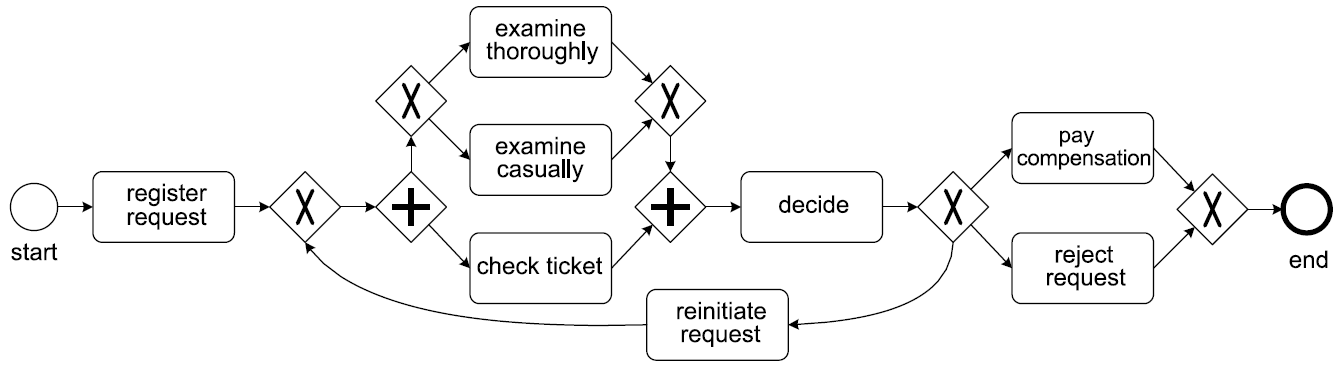

This section briefly explains what modeling formalisms exist in PM4Py while applying different process discovery algorithms.
Secondly, we give an overview of the implemented process discovery algorithms, their output type(s), and how we can invoke them.
Finally, we discuss the challenges of applying process discovery in practice.
Note that, we will not explain the internal workings of the algorithms presented here.
For more information regarding the algorithmic details, consider the [Coursera MOOC](https://www.coursera.org/learn/process-mining) or the papers/articles/web pages we refer to in the notebook.

## Obtaining a Process Model

There are three different process modeling notations that are currently supported in PM4Py.
These notations are: [BPMN](https://www.bpmn.org/), i.e., models such as the ones shown earlier in this tutorial, *Process Trees* and *Petri nets*.
A Petri net is a more mathematical modeling representation compared to BPMN.
Often, the behavior of a Petri net is more difficult to comprehend compared to BPMN models.
However, due to their mathematical nature, Petri nets are typically less ambiguous (i.e., confusion about their described behavior is not possible).
Process Trees represent a strict subset of Petri nets and describe process behavior in a hierarchical manner.
In this tutorial, we will focus primarily on BPMN models and process trees.
For more information about Petri nets and their application to (business) process modeling (from a ‘workflow’ perspective), we refer to [this article](https://www.researchgate.net/profile/Wil_Aalst/publication/220337578_The_Application_of_Petri_Nets_to_Workflow_Management/links/0deec517a563a45197000000/The-Application-of-Petri-Nets-to-Workflow-Management.pdf?_sg%5B0%5D=2TrqDbNsoZEr67XgOwI_9qxtlO_S1HJFHn8edW7aE0fMWzmsY0D1GhrsbRXdtZhTLvQ1KcSm9pkLzooDMl-eRg.DhnNamQg4EvK8MAwucwkB1VDke7eNq0E4jxMAa2IMXXZtvr9k1PPiwZpQEt1Z2iqkdkN-SOlWyjFloP-BivLow&_sg%5B1%5D=XeHToX2_7feAtM6yO395-HEYttSzdWJeiLaGlD_7Dn3hRXYnVXya0-dHm5RWmjX22gF3ton7d7FSzF6FjL_NYZCQzRvJuPg4zPWnk_HCe0xj.DhnNamQg4EvK8MAwucwkB1VDke7eNq0E4jxMAa2IMXXZtvr9k1PPiwZpQEt1Z2iqkdkN-SOlWyjFloP-BivLow&_iepl=).

Interestingly, none of the algorithms implemented in PM4Py directly discovers a BPMN model.
However, any process tree can easily be translated to a BPMN model.
Since we have already discussed the basic operators of BPMN models, we will start with the discovery of a process tree, which we convert to a BPMN model.
Later, we will study the ‘underlying’ process tree.
The algorithm that we are going to use is the ‘Inductive Miner’;
More details about the (inner workings of the) algorithm can be found in [this article](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.396.197&rep=rep1&type=pdf).
Consider the following code snippet showing how to obtain a BPMN model from an event log.

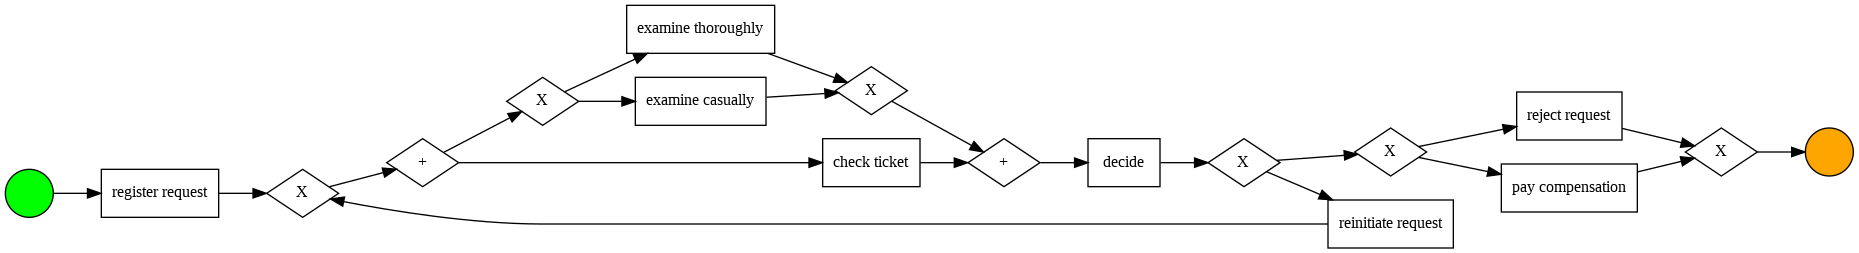

In [48]:
df = pm4py.format_dataframe(pd.read_csv(path +'running_example.csv', sep=';'), case_id='case_id',activity_key='activity',
                             timestamp_key='timestamp')
bpmn_model = pm4py.discover_bpmn_inductive(df)
pm4py.view_bpmn(bpmn_model)

Observe that the process model that we discovered, describes the same behavior as the model that we have shown above.

As indicated, the algorithm used in this example actually discovers a *Process Tree*.
Such a process tree is, mathematically speaking, a *rooted tree*, annotated with ‘control-flow’ information.
We’ll first use the following code snippet to discover a process tree based on the running example, and, afterwards shortly analyze the model.

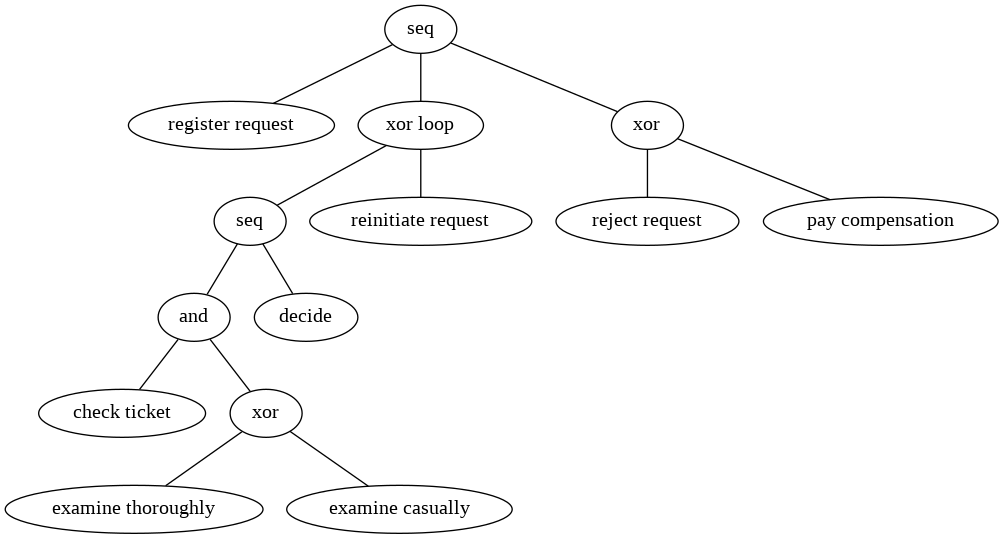

In [49]:
process_tree = pm4py.discover_process_tree_inductive(df)
pm4py.view_process_tree(process_tree)

We'll analyze the process tree model from top to bottom.
The first circle, i.e., the ‘root’ of the process tree, describes a sequence.
This means that, when srolling further down, the process described by the model executes the ‘children’ of the root from left to right.
Hence, first “register request” is executed, followed by the circle node with the xor loop, finally to be followed by the node with the xor.
The node with the loop represents ‘repeated behavior’, i.e., the possibility to repeat the behavior.
When scrolling further down, the left-most ‘subtree’ of the xor loop is always executed, the right-most child (in this case, “reinitiate request”) triggers a repeated execution of the left-most child.
Observe that this is in line with the process models we have seen before, i.e., the “reinitiate request” activity allows us to repeat the behavior regarding examinations and checking the ticket.
When we go further down below in the subtree of the xor loop, we again observe a seq node.
Hence, its left-most child is executed first, followed by its right-most child (“decide”).
The left-most child of the seq node has an and.
This represents concurrent behavior; hence, its children can be executed simultaneously or in any order.
Its left-most child is the “check ticket” activity.
Its right-most child is a node with an xor (just like the right-most child of the tree's root).
This represents an exclusive choice, i.e., one of the children is executed (either “examine casually” or “examine thoroughly”).
Observe that the process tree describes the exact same behavior as the BPMN models shown before.

There are different ways to obtain a petri net:
- Let the algorithm directly return a Petri net.
- Convert the obtained process tree to a Petri net (recall that process trees are a strict sub-class of Petri nets).
For example:

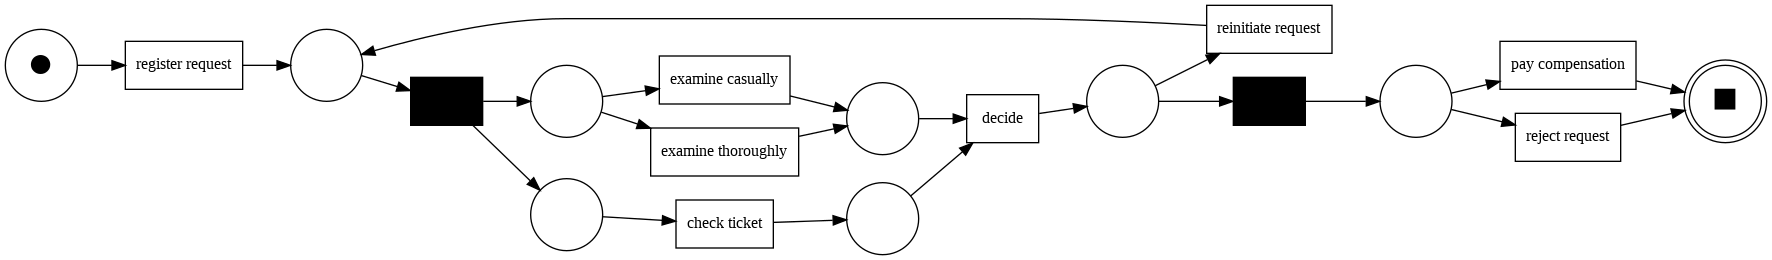

In [50]:
net1, im1, fm1 = pm4py.convert_to_petri_net(process_tree)
pm4py.view_petri_net(net1,im1,fm1)

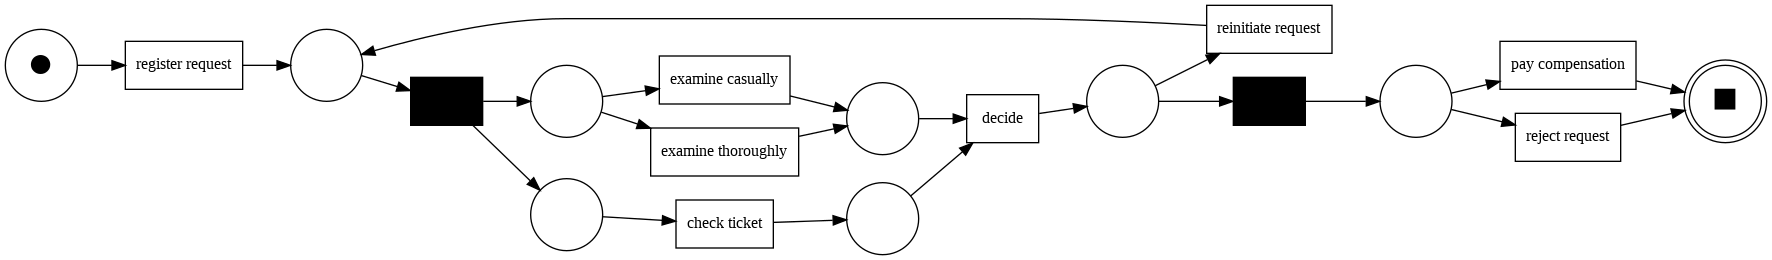

In [51]:
net2, im2, fm2 = pm4py.discover_petri_net_inductive(df)
pm4py.view_petri_net(net2, im2, fm2)

Observe that both functions return three arguments, i.e., the Petri net, an initial and a final marking.
Unsurprisingly, the two models are the same (i.e., the ```pm4py.discover_petri_net_inductive(df)``` function applies the conversion internally).
However, there are alternative algorithms implemented in pm4py, that allow you obtain a Petri net based on an event log.
These algorithms are:
* [The alpha miner](https://en.wikipedia.org/wiki/Alpha_algorithm); One of the first process discovery algorithms
* [The alpha+ miner](https://pure.tue.nl/ws/files/1864325/576199.pdf); Extension of the alpha miner that handles length-one-loops and short loops.

Invocation of the aformentioned algorithms is straightforward:

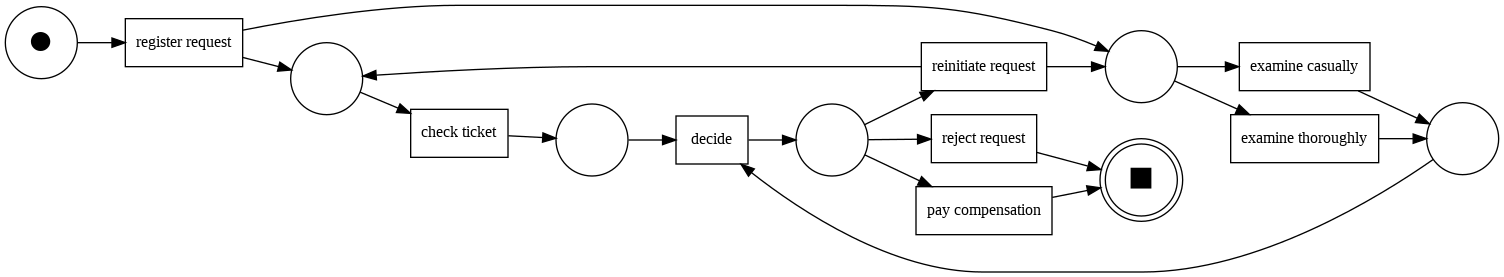

In [52]:
net3, im3, fm3 = pm4py.discover_petri_net_alpha(df)
pm4py.view_petri_net(net3, im3, fm3)

<ipython-input-53-f8df0e0dd595>:1: DeprecatedWarning: discover_petri_net_alpha_plus is deprecated as of 2.3.0 and will be removed in 3.0.0. this method will be removed in a future release.
  net4, im4, fm4 = pm4py.discover_petri_net_alpha_plus(df)


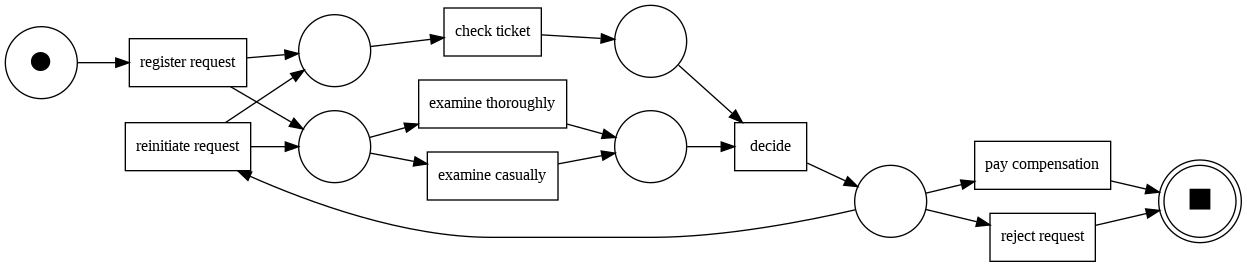

In [53]:
net4, im4, fm4 = pm4py.discover_petri_net_alpha_plus(df)
pm4py.view_petri_net(net4, im4, fm4)

Note that, by definition, the alpha miner variants cannot discover invisible transitions (black boxes).
Additionally, these algorithms have no form of formal quality guarantees w.r.t. the resulting process models.
As such, **we strongly discourage the use of the alpha miners in practice, apart from educational purposes.**

## Obtaining a Process Map

Many [commercial process mining solutions](https://www.gartner.com/reviews/market/process-mining) do not provide extended support for discovering process models.
Often, as a main visualization of processes, *process maps* are used.
A process map contains activities and connections (by means of arcs) between them.
A connection between two activities usually means that there some form of precedence relation.
In its simplest form, it means that the ‘source’ activity directly precedes the ‘target’ activity.
Let’s quickly take a look at a concrete example!
Consider the following code snippet, in which we learn a ‘Directly Follows Graph’ (DFG)-based process map.

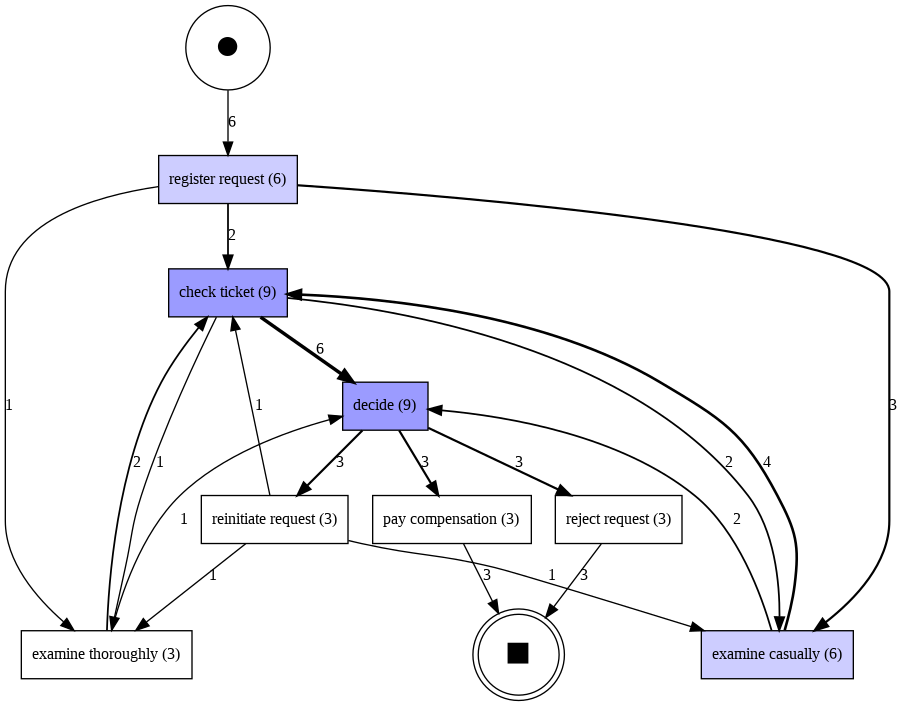

In [54]:
dfg, start_activities, end_activities = pm4py.discover_dfg(df)
pm4py.view_dfg(dfg, start_activities, end_activities)

The pm4py.discover_dfg(log) function returns a triple.
The first result, i.e., called dfg in this example, is a dictionary mapping pairs of activities that follow each other directly, to the number of corresponding observations.
The second and third arguments are the start and end activities observed in the event log (again counters).
In the visualization, the green circle represents the start of any observed process instance.
The orange circle represents the end of an observed process instance.
In 6 cases, the register request is the first activity observed (represented by the arc labeled with value 6).
In the event log, the check ticket activity is executed directly after the register request activity.
The examine thoroughly activity is following registration once, examine casually follows 3 times.
Note that, indeed, in total, the register activity is followed by 6 different events, i.e., there are 6 traces in the running example event log.
However, note that there are typically much more relations observable compared to the number of cases in an event log.
Even using this simple event data, the DFG-based process map of the process is much more complex than the process models learned earlier.
Furthermore, it is much more difficult to infer the actual execution of the process based on the process map.
Hence, when using process maps, one should be very carefully when trying to comprehend the actual process.

In PM4Py, we also implemented the [Heuristics Miner](https://ieeexplore.ieee.org/iel5/5937059/5949295/05949453.pdf), a more advanced process map discovery algorithm, compared to its DFG-based alternative.
We won’t go into the algorithmic details here, however, in a HM-based process map, the arcs between activities represent observed concurrency.
For example, the algorithm is able to detect that the ticket check and examination are concurrent.
Hence, these activities will not be connected in the process map.
As such, a HM-based process map is typically simpler compared to a DFG-based process map.

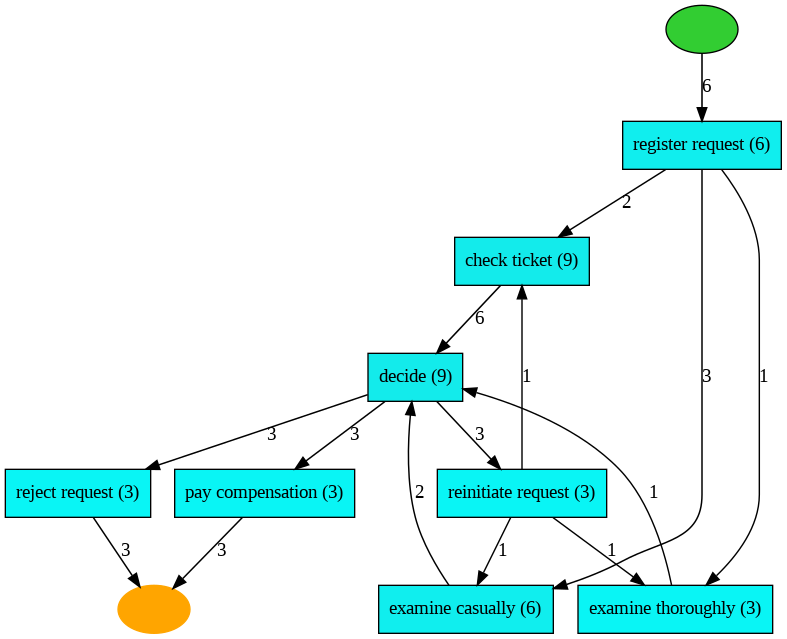

In [55]:
map = pm4py.discover_heuristics_net(df)
pm4py.view_heuristics_net(map)

## Advanced Discovery: Handling Noise

In the previous section (2. Event Data Filtering), we have already seen some generic ways of data filtering.
However, most of the functionalities presented there are useful for preprocessing the event data.
After preprocessing, it often happens that event data is still containing various 'problematic cases' that were hard to filter out.
We won't go into too much detail here, however, various causes of outliers and noise in cleaned event data exist.
Some algorithms have built-in filtering mechanisms, allowing you to filter the cleaned event data internally.

Consider the following example, in which we use a 'broken' variant of the running example data (some events are missing), with and without filtering.

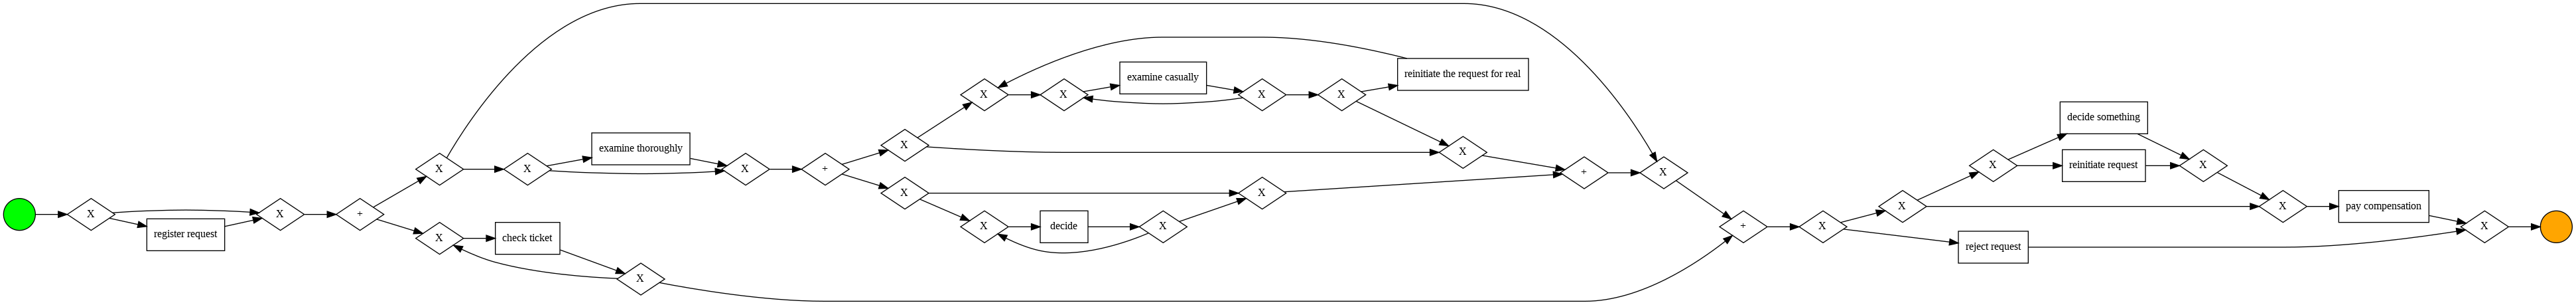

In [56]:
df_broken = pd.read_csv(path +'running_example_broken.csv', sep=';')
df_broken = pm4py.format_dataframe(df_broken)
bpmn_unfiltered = pm4py.discover_bpmn_inductive(df_broken)
pm4py.view_bpmn(bpmn_unfiltered)

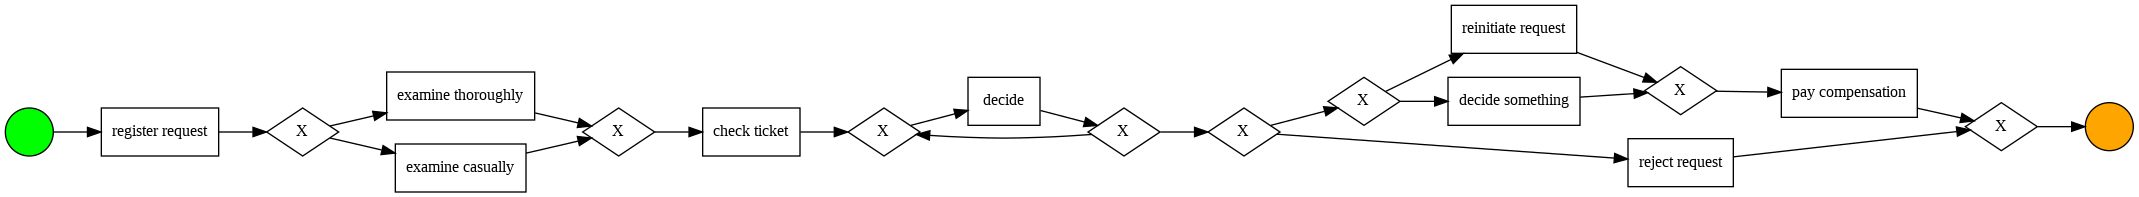

In [57]:
bpmn_filtered = pm4py.discover_bpmn_inductive(df_broken, 0.8)
pm4py.view_bpmn(bpmn_filtered)

Observe that the first model, i.e., without any form of filtering, allows us to skip a large part of the model.
Furthermore, the model describes various 'options to go back'.
Hence, we can arbitrarily skip a lot of activities, yet, go back to previous states in the process at the same time.
This implies that the model, in fact, describes that virtually anything can happen.

The other model, on the other hand, applies rigorous filtering.
As a result, the process model does no longer describe all possible behavior in the input event log (a guarantee by the Inductive Miner without filtering).
However, it describes much less variation.
Arguably, this is a better model for the given event data since it is much more *precise*.

## Final Thoughts
The examples presented here show some great process discovery in action.
However, this article would not be complete without a few critical notes from an academic that has spent a large part of his professional career in developing and applying process mining algorithms.
First and foremost, make sure to play around with some real event data, which you can download [here](http://processmining.org/event-data.html).
You will most likely notice that the models you discover (even with various filtering threshold values) are largely useless.
They either are i) too complex or ii) too imprecise.
There are various reasons for this, some of which, we'll briefly touch upon here:
- *Data Granularity Mismatch*; The process models that we use to model (business) processes tend to be of a certain level of abstraction.
For example, in the running example, we describe the registration of a request simply as 'register request'.
However, it is very likely that the system modeling said registration, registers the effective registration request at a lower level.
Various system calls and data-base overwrites may be logged in the event data.
Often, these low level events do not follow a pre-defined sequential pattern, hence, large variability may easily exit.
Larger variability implies a larger data complexity, i.e., if 10 activities are able to occur in parallel, this implies that there are 10!=10\*9\*8\*...\*1=3.628.800 ways to schedule these activities.
However, natural bias and skew in the process execution exists, which often renders us to observe an incomplete subset.
Hence, to obtain a more reasonable process model, the recorded event data may need to be *abstracted* first.
For an elaborate overview, see [this article](http://sebastiaanvanzelst.com/wp-content/uploads/2020/04/Granular_Computing_in_Process_Mining.pdf).
- *No Contextual Activity Differentiation*;
The state-of-the-art discovery algorithms consider every activity of the same type, to be of the same type.
That sounds vague, however, an example easily clarifies this problem.
Consider modeling a process model of your daily routine.
It is likely that you sometimes shower in the morning, and, sometimes in the evening.
When modeling this as a process model, i.e., when you as a human modeler model this, it is likely that you actually create two shower activities in the model.
One of these activities represents taking a shower in the morning, whereas the other represents taking a shower in the evening.
Hence, when learning a process model of your daily routine, the discovery algorithm will place both your breakfast, and your diner close to the showering activity.
In fact, it will likely allow you to skip breakfast and diner, and, allow you to 'go back' to the dinner.
That is, the exact same problem occurs as the problem that we already observed when learning process models based on noisy data.
There are some solutions for this problem, i.e., referred to as 'label splitting' (see [this article](https://pure.tue.nl/ws/files/58626874/BPM2016Lu.pdf)).
In a nutshell, such an algorithm tries to detect if certain activities (such as 'showering') should be split up in say, an activity 'shower1' and 'shower2'.
After such a split, the algorithm will learn activity instances for both 'shower1' and 'shower2', which we can both replace by the 'shower' activity in a post-processing step.
- *Ignorance of Activity Duration*
The majority of the existing process discovery algorithms assume activities to be of an atomic fashion (i.e., they have a single timestamp and no duration).
In reality, however, most activities take some time (even automated system activities tend to take a few milliseconds).
Whereas the XES standard provides means to differentiate between start and end activities, hardly any discovery algorithm uses this information (e.g., the Inductive Miner - Life Cycle Algorithm (IMLC) does use this information).
As such, process models tend to become complex, since activity start and end are modeled in a separate manner.
Note that, even in case activities are recorded as atomic events, after applying event abstraction (i.e., see the previous point on *Data Granularity*), activity start and end timestamps are present by definition.
- *Ignorance of Domain Knowledge*
Most process discovery algorithms only look at the sequential ordering of (atomic) events, i.e., the do not exploit any indicative auxillary data.
Furthermore, they provide limited to no user interaction.
It might be the case that a certain execution of a process is happening frequently, yet, should not be executed as it is recorded, i.e., one does not aim to model the specific execution within the model.
Since the majority of the filtering algorithms that exist use trace-frequency as a primary driver (implicitly or explicitly) these type of problems will not be identified.
For example, in a real life, publicly available log concerning the administration of road-traffic fines, one of the most ocurring process executions is represented by offenders that do not pay the fine.
Clearly, one wants to exclude the possibility of not paying from any discovered representative model (although observing the fact that this happens is extremely valuable for the business).
Novel developments in the field of process mining put more emphasis on such domain knowledge integration.
For example, consider the recently relased process discovery tool [CORTADO](http://cortado.fit.fraunhofer.de).

These problems described here, are just a few problems (of the many) that hamper the direct application of process mining (for example, we did not even cover the n:m-relation problem of objects and events).
This does not mean that process discovery is useless.
Rather, it is important to take into account that a discovered process model is just the starting point of an event data analysis, i.e., not the end result.
Truth be told, when analyzing real event data, visual analytic tools (e.g., the [Variant Explorer](https://fmannhardt.de/blog/static/3770b2fe8bbe79afd99c0368f22ab931/d56b5/explore-event-log.png) and the [Dotted Chart](https://a.fsdn.com/con/app/proj/prom/screenshots/LogProjection.png/max/max/1)) can reveal various useful patterns that provide insights into a process and allow further event data preprocessing.




# 4. Conformance Checking

In this tutorial, we'll be focusing on *conformance checking*.
The conceptual idea of conformance checking is rather easy, i.e., computing to what degree a given process model conforms to the exeuction of a process, as recorded by the event data.
We are going to use the same process model as we have seen before, i.e., based on our running example event log (running_example.csv):

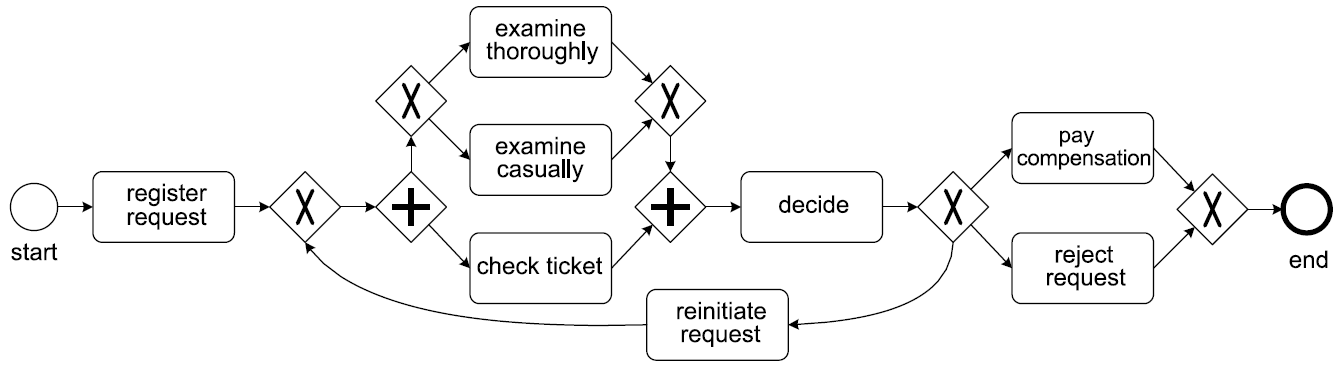

However, to check conformance w.r.t. the model, we're going to use a slightly different event log (/running_example_broken.csv).
In this tutorial, we'll consider two types of techniques, i.e., *token-based-replay*, and, *alignments*.


## Token-Based-Replay

In order to understand token-based-replay, we first need to cover a bit of Petri-net theory.
Let's use the Petri net based on the clean running example event log (/running_example.csv), as an example.

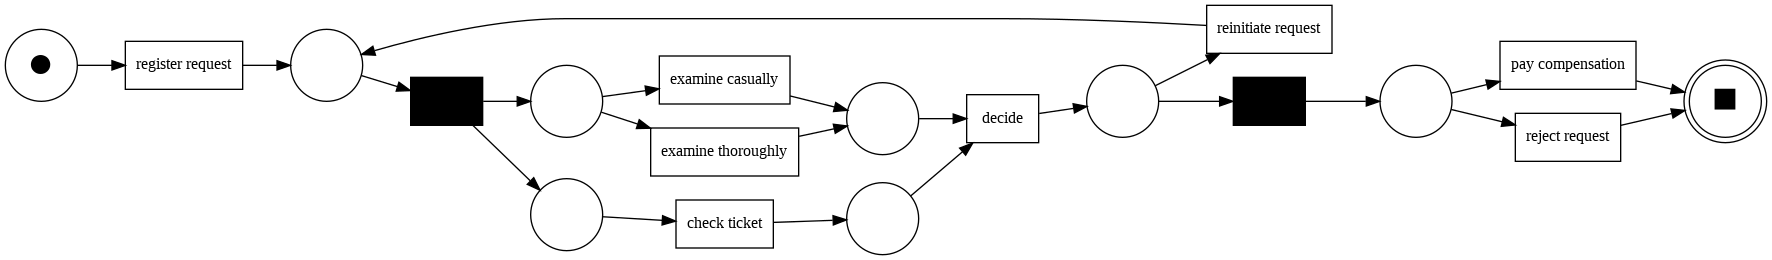

In [58]:
df = pm4py.format_dataframe(pd.read_csv(path +'running_example.csv', sep=';'), case_id='case_id',activity_key='activity',
                             timestamp_key='timestamp')
pn, im, fm = pm4py.discover_petri_net_inductive(df)
pm4py.view_petri_net(pn, im, fm)

### Places and Transitions
Observe that the Petri net consists of two different type of nodes, i.e., circles and rectangles.
We refer to the circles as *places* and we refer to the rectangles as *transitions*.
Furthermore, notice that, a place can only be connected (by means of an arc) to a transition.
Similarly, a transition can only be connected (by means of an arc) to a place.
Hence, *places never connect directly to places* and *transitions never connect directly to transitions*.

### Tokens, Enabledness and Transition Firing
There is one place in the model containing a black 'dot'.
This dot is referred to as a *token*.
For convienence, let's call the place containing the token 'source'.
A transition can consume and produce tokens, referred to as *firing a transition*.
A transition is allowed to fire, if all of its 'incoming places' contain at least one token.
Any transition for which this property holds is referred to as an *enabled transition*.
In the example net, only the 'source' place contains a token.
Consequently, the only transition that has a token in all of its 'incoming places' is the transition *register request*, i.e., it is enabled.
If we diced to fire the an enabled transition, it consumes one token from each of its 'incoming places' and it produces a token in each of its 'outgoing places'.
For example, if we *fire* the *register request* transition, it consumes the token in the source place and it produces a fresh token in its outgoing place (i.e., the place connected to it by means of an outgoing arc).

*It is extremely important to note that there is no relationship between token production and consumption, i.e., tokens that are consumed cease to exist, tokens that are produced are always "fresh tokens"*.


### Token-Based-Replay - The Basics
When we use token-based-based-replay, we are effecitvely mimicking behavior observed in the event log in the context of a given process model.

Let's assume that in the event log, we observe the trace:


$\langle \text{register request, examine casually, check ticket, decide, reject request} \rangle$

The token-based replay algorithm will simply mimick the trace in the model and keep track of the number of tokens we need to produce, respectively consume to *replay* the trace in the model.
For example, the first activity in the trace, i.e., *register request*, can be directly mimicked by consuming the token in the source place.
To subsequently fire the *examine causally* activity, we need the token produced by firing the *register request* transition.
The token needs to be consumed by the *black* transition (this is referred to as an invisible transition) that connects to the output place of the *register request* transition.
Said transition will produce two fresh tokens (observe that it has two outgoing places), one of which can subsequently be consumed by the *examine casually* transition.
Essentially, the token-based-replay algorithm keeps repeating this rationale, until it has mimicked the complete trace.

In the previous example, the trace can be completely mimicked (or *replayed*) by the model.
However, consider the trace:

$\langle \text{register request, examine casually, check ticket, reject request} \rangle$

When analyzing the trace, we observe that a decision is missing.
The token-based-replay algorithm can detect this, i.e., it can detect that due to the lack of the *decide* transition in the trace, when mimicking it, tokens would remain in the input places of the *decide* transition, and, similarly, tokens would be missing in the input place of the *reject request* transition.

For a given event log, the token-based-replay algorithm simply mimicks every trace in the event log, and, keeps track of the number of detected problems (missing and remaining tokens when mimicking the bahvior).
It subsequently compares the dected number of problems with the total amount of 'correct behavior' and produces a 'conformity score' (often referred to as a 'fitness' score) between $0$ and $1$.
If the score is $1$, no problems were detected.
If the score is $0$, no normal behavior was detected.

### Token-Based-Replay in pm4py

In [59]:
pm4py.fitness_token_based_replay(df, pn, im, fm)

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

In the previous example, we observe that all traces in the event log perfectly comply with the model.
This is the case because the algorithm we used always guarantees it, i.e., it will always describe all behavior given to it in the event log.

Let's consider computing fitness when using an event log that has some problems, i.e., w.r.t. the model that we learned on the clean event log.

In [60]:
df_problems = pm4py.format_dataframe(pd.read_csv(path +'running_example_broken.csv', sep=';'), case_id='case:concept:name',activity_key='concept:name',
                             timestamp_key='time:timestamp')
pm4py.fitness_token_based_replay(df_problems, pn, im, fm)

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

{'perc_fit_traces': 16.666666666666668,
 'average_trace_fitness': 0.8077731092436974,
 'log_fitness': 0.8156108597285068,
 'percentage_of_fitting_traces': 16.666666666666668}

In this case, only $16\frac{2}{3}$ percent of the cases fits w.r.t. the model
Yet, the total fitness score is still $0.8$.
We can roughly interpret this as $80\%$ of the behavior in the event log is fitting the model.

### Using Other Process Model Formalisms

In ``pm4py``, the token-based-replay algorithm is only defined for Petri nets.
Hence, if we have other model types, e.g., a process tree or a BPMN model, we need to convert these to Petri nets.

In [61]:
tree = pm4py.discover_process_tree_inductive(df)
pn, im, fm = pm4py.convert_to_petri_net(tree)
pm4py.fitness_token_based_replay(df_problems, pn, im, fm)

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

{'perc_fit_traces': 16.666666666666668,
 'average_trace_fitness': 0.8077731092436974,
 'log_fitness': 0.8156108597285068,
 'percentage_of_fitting_traces': 16.666666666666668}

In [62]:
bpmn = pm4py.discover_process_tree_inductive(df)
pn, im, fm = pm4py.convert_to_petri_net(bpmn)
pm4py.fitness_token_based_replay(df_problems, pn, im, fm)

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

{'perc_fit_traces': 16.666666666666668,
 'average_trace_fitness': 0.8077731092436974,
 'log_fitness': 0.8156108597285068,
 'percentage_of_fitting_traces': 16.666666666666668}

In general, a process tree, i.e. no matter the source (whether it is designed by hand or discovered by a discovery algorithm), can always be translated into a Petri net, without any problems.
For BPMN models this is not the case.
In the example, we use the inductive miner, which always yields a process tree.
As such, the BPMN model we discovered is actually a process tree transformed into a BPMN model.
As a consequence, the subsequent transformation into a Petri net will not yield any problems.
However, in general, various quality issues can emerge when converting an arbitrary BPMN model into a Petri net, i.e., from a conformance checking perspective.

## Diagnostics

Thusfar, we have shown how to compute a number, quantifying how well the given event log and model conform to one another.
However, token-based-replay does not provide detailed diangostics on the problems detected (albeit we did implement rudimentary diagnostics based on token-based-replay).
To compute *conformance diagnostics* we advocate the use of *alignments*.
For convienence, let's again consider our process model:

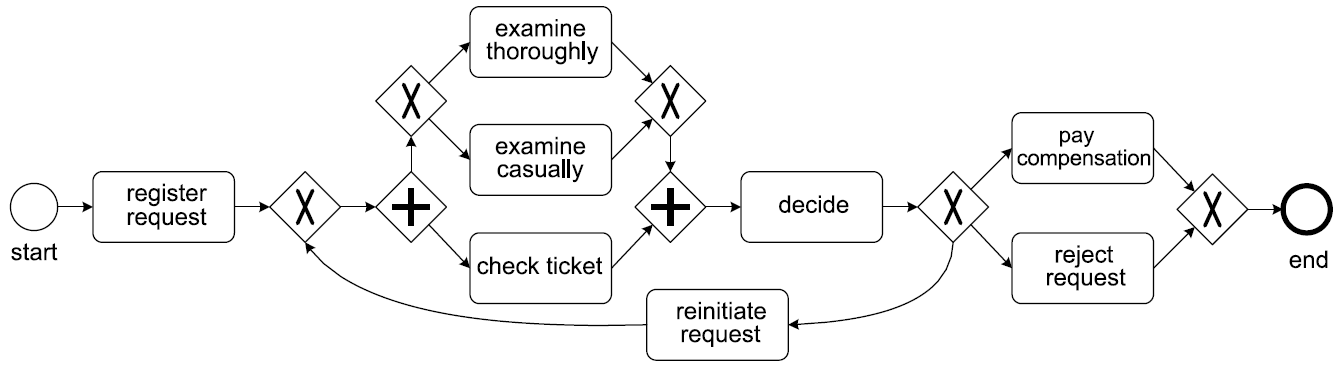

### Alignments


Simply put, an *alignmnet* maps the observed trace onto the *closest* firing sequence described by the model:
Let's revisit our earlier example, i.e.,

$\langle \text{register request, examine casually, check ticket, decide, reject request} \rangle$.

An alignment of the this trace looks as follows:

$\langle \text{(register request,register request), (examine casually, examine casually), (check ticket, check ticket), (decide, decide), (reject request, reject request)} \rangle$.


The alignment is a sequence of pairs, e.g., $(register request,register request)$, $(examine casually, examine casually)$.
In each pair, the first element corresponds to observed behavior in the log whereas the second argument corresponds to an action in the model.
Hence, the closest 'behavior' that the observed trace can be moapped to is  $\langle \text{register request, examine casually, check ticket, decide, reject request} \rangle$, i.e., exactly the same sequence of action as the observed trace.
This makes sense as the model actually describes the observed trace.

### Non-Fitting Behavior

In certain cases, observed behavior cannot be mimicked by the model, or, behavior may be missing.
In both cases, we use the $\gg$ symbol to represent this.

For example, consider the trace:

$\langle \text{register request, register request, examine casually, check ticket, reject request} \rangle$

It is quite easy to see that, given the reference model presented earlier, the *register request* transition is duplicated, and, the *decide* activity is missing.
An alignment of the trace w.r.t. the model shown before quantifies this exactly:

$\langle \text{(register request, register request), (register request, }\gg\text{), (examine casually, examine casually), (check ticket, check ticket), (}\gg\text{, decide), (reject request, reject request)} \rangle$

The elements of the alignment (which we refer to as moves) reflect our observation before.

1. The firs *register request* activity is also described by the model
2. The second *register request* activity is not described by the model (i.e., the first argument refers to the trace, the 2nd argument $\gg$ represents to the model).
3. The *examine casually* activity is described by the log and the model
4. The *check ticket* activity is described by the log and the model
5. The *decide* activity was not observed in the data, yet, the model describes that it is supposed to be observed
6. The *reject request* activity is described by the log and the model

Observe that, according to the alignment, the given trace should be mapped on the following model behavior:

$\langle \text{register request, examine casually, check ticket, decide, reject request} \rangle$

### Alignments in pm4py

Like token-based-replay, computing alignments in ``pm4py`` is rather straightforward:

In [63]:
pn, im, fm = pm4py.discover_petri_net_inductive(df)
pm4py.conformance_diagnostics_alignments(df_problems, pn, im, fm)

aligning log, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

[{'alignment': [('>>', 'register request'),
   ('>>', None),
   ('examine thoroughly', 'examine thoroughly'),
   ('check ticket', 'check ticket'),
   ('decide', 'decide'),
   ('>>', None),
   ('reject request', 'reject request')],
  'cost': 10002,
  'visited_states': 7,
  'queued_states': 22,
  'traversed_arcs': 22,
  'lp_solved': 1,
  'fitness': 0.8888888888888888,
  'bwc': 90002},
 {'alignment': [('register request', 'register request'),
   ('>>', None),
   ('check ticket', 'check ticket'),
   ('examine casually', 'examine casually'),
   ('>>', 'decide'),
   ('>>', None),
   ('pay compensation', 'pay compensation')],
  'cost': 10002,
  'visited_states': 7,
  'queued_states': 23,
  'traversed_arcs': 23,
  'lp_solved': 8,
  'fitness': 0.8888888888888888,
  'bwc': 90002},
 {'alignment': [('register request', 'register request'),
   ('>>', None),
   ('>>', 'examine casually'),
   ('check ticket', 'check ticket'),
   ('decide', 'decide'),
   ('reinitiate request', '>>'),
   ('>>', None),


Like token-based-replay, alignments can also be used to quantify 'fitness':

In [64]:
pm4py.fitness_alignments(df_problems, pn, im, fm)

aligning log, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

{'percFitTraces': 16.666666666666668,
 'averageFitness': 0.8446623093681916,
 'percentage_of_fitting_traces': 16.666666666666668,
 'average_trace_fitness': 0.8446623093681916,
 'log_fitness': 0.843731055042718}

# 5. Advanced Examples

## Process Mining

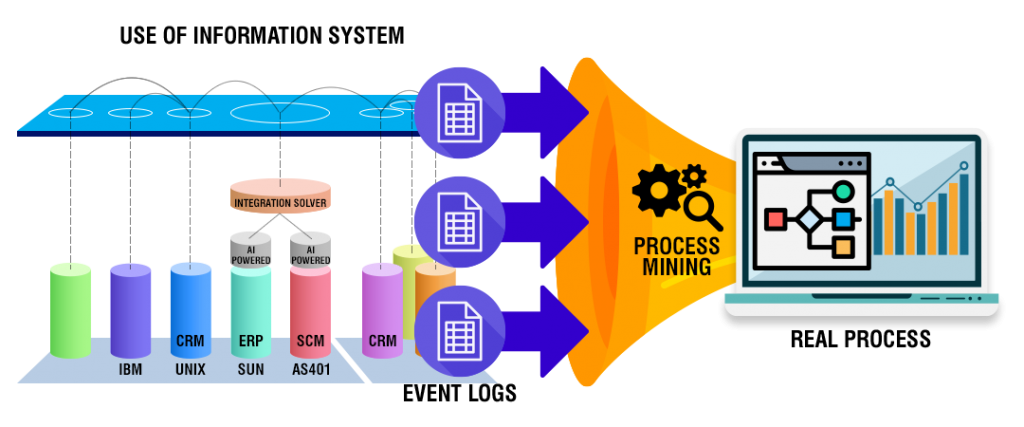

## Data Exploration

In [66]:
# Import Log
log = pm4py.read_xes(path +'receipt.xes', return_legacy_log_object=True)

parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

In [67]:
df = pm4py.convert_to_dataframe(log)
df['time:timestamp']=pd.to_datetime(df['time:timestamp'], utc=True) # format the timestamp column
df.head()

/usr/local/lib/python3.10/dist-packages/pm4py/utils.py:494: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


org:group concept:instance org:resource                        concept:name  \
0   Group 1       task-42933   Resource21             Confirmation of receipt   
1   Group 4       task-42935   Resource10   T02 Check confirmation of receipt   
2   Group 1       task-42957   Resource21  T03 Adjust confirmation of receipt   
3   Group 4       task-47958   Resource21   T02 Check confirmation of receipt   
4     EMPTY       task-43021   Resource30             Confirmation of receipt   

                    time:timestamp lifecycle:transition  \
0 2011-10-11 11:45:40.276000+00:00             complete   
1 2011-10-12 06:26:25.398000+00:00             complete   
2 2011-11-24 14:36:51.302000+00:00             complete   
3 2011-11-24 14:37:16.553000+00:00             complete   
4 2011-10-18 11:46:39.679000+00:00             complete   

                    case:startdate case:responsible  \
0 2011-10-11 11:42:22.688000+00:00       Resource21   
1 2011-10-11 11:42:22.688000+00:00       Resource21   
2 2011-10-11 11:42:22.688000+00:00       Resource21   
3 2011-10-11 11:42:22.688000+00:00       Resource21   
4 2011-10-10 23:06:40.020000+00:00       Resource04   

              case:enddate_planned case:department case:group  \
0 2011-12-06 12:41:31.788000+00:00         General    Group 2   
1 2011-12-06 12:41:31.788000+00:00         General    Group 2   
2 2011-12-06 12:41:31.788000+00:00         General    Group 2   
3 2011-12-06 12:41:31.788000+00:00         General    Group 2   
4 2011-12-06 00:06:40.010000+00:00         General    Group 5   

  case:concept:name                    case:deadline case:channel  \
0        case-10011 2011-12-06 12:41:31.788000+00:00     Internet   
1        case-10011 2011-12-06 12:41:31.788000+00:00     Internet   
2        case-10011 2011-12-06 12:41:31.788000+00:00     Internet   
3        case-10011 2011-12-06 12:41:31.788000+00:00     Internet   
4        case-10017        2011-12-06 00:06:40+00:00     Internet   

                      case:enddate  
0                              NaT  
1                              NaT  
2                              NaT  
3                              NaT  
4 2011-10-18 11:56:55.943000+00:00

In [68]:
c17 = df[df['case:concept:name'] =='case-10017']
c17

org:group concept:instance org:resource  \
4      EMPTY       task-43021   Resource30   
5    Group 1       task-43672   Resource30   
6    Group 4       task-43671   Resource30   
7    Group 1       task-43674   Resource30   
8    Group 4       task-43675   Resource30   
9    Group 1       task-43673   Resource30   
10   Group 1       task-43676   Resource30   
11   Group 4       task-43679   Resource30   
12   Group 1       task-43686       admin2   

                                  concept:name  \
4                      Confirmation of receipt   
5       T06 Determine necessity of stop advice   
6            T02 Check confirmation of receipt   
7           T03 Adjust confirmation of receipt   
8            T02 Check confirmation of receipt   
9   T10 Determine necessity to stop indication   
10          T03 Adjust confirmation of receipt   
11           T02 Check confirmation of receipt   
12          T03 Adjust confirmation of receipt   

                     time:timestamp lifecycle:transition  \
4  2011-10-18 11:46:39.679000+00:00             complete   
5  2011-10-18 11:47:06.950000+00:00             complete   
6  2011-10-18 11:47:26.235000+00:00             complete   
7  2011-10-18 11:47:41.811000+00:00             complete   
8  2011-10-18 11:47:57.979000+00:00             complete   
9  2011-10-18 11:48:15.357000+00:00             complete   
10 2011-10-18 11:48:30.632000+00:00             complete   
11 2011-10-18 11:51:01.525000+00:00             complete   
12 2011-10-18 11:56:57.603000+00:00             complete   

                     case:startdate case:responsible  \
4  2011-10-10 23:06:40.020000+00:00       Resource04   
5  2011-10-10 23:06:40.020000+00:00       Resource04   
6  2011-10-10 23:06:40.020000+00:00       Resource04   
7  2011-10-10 23:06:40.020000+00:00       Resource04   
8  2011-10-10 23:06:40.020000+00:00       Resource04   
9  2011-10-10 23:06:40.020000+00:00       Resource04   
10 2011-10-10 23:06:40.020000+00:00       Resource04   
11 2011-10-10 23:06:40.020000+00:00       Resource04   
12 2011-10-10 23:06:40.020000+00:00       Resource04   

               case:enddate_planned case:department case:group  \
4  2011-12-06 00:06:40.010000+00:00         General    Group 5   
5  2011-12-06 00:06:40.010000+00:00         General    Group 5   
6  2011-12-06 00:06:40.010000+00:00         General    Group 5   
7  2011-12-06 00:06:40.010000+00:00         General    Group 5   
8  2011-12-06 00:06:40.010000+00:00         General    Group 5   
9  2011-12-06 00:06:40.010000+00:00         General    Group 5   
10 2011-12-06 00:06:40.010000+00:00         General    Group 5   
11 2011-12-06 00:06:40.010000+00:00         General    Group 5   
12 2011-12-06 00:06:40.010000+00:00         General    Group 5   

   case:concept:name             case:deadline case:channel  \
4         case-10017 2011-12-06 00:06:40+00:00     Internet   
5         case-10017 2011-12-06 00:06:40+00:00     Internet   
6         case-10017 2011-12-06 00:06:40+00:00     Internet   
7         case-10017 2011-12-06 00:06:40+00:00     Internet   
8         case-10017 2011-12-06 00:06:40+00:00     Internet   
9         case-10017 2011-12-06 00:06:40+00:00     Internet   
10        case-10017 2011-12-06 00:06:40+00:00     Internet   
11        case-10017 2011-12-06 00:06:40+00:00     Internet   
12        case-10017 2011-12-06 00:06:40+00:00     Internet   

                       case:enddate  
4  2011-10-18 11:56:55.943000+00:00  
5  2011-10-18 11:56:55.943000+00:00  
6  2011-10-18 11:56:55.943000+00:00  
7  2011-10-18 11:56:55.943000+00:00  
8  2011-10-18 11:56:55.943000+00:00  
9  2011-10-18 11:56:55.943000+00:00  
10 2011-10-18 11:56:55.943000+00:00  
11 2011-10-18 11:56:55.943000+00:00  
12 2011-10-18 11:56:55.943000+00:00

In [69]:
# Number of Cases
df['case:concept:name'].nunique()

1434

In [70]:
# Activity Ocurrences
df["concept:name"].value_counts()

Confirmation of receipt                                  1434
T06 Determine necessity of stop advice                   1416
T02 Check confirmation of receipt                        1368
T04 Determine confirmation of receipt                    1307
T05 Print and send confirmation of receipt               1300
T10 Determine necessity to stop indication               1283
T03 Adjust confirmation of receipt                         55
T07-1 Draft intern advice aspect 1                         45
T11 Create document X request unlicensed                   44
T12 Check document X request unlicensed                    41
T15 Print document X request unlicensed                    39
T14 Determine document X request unlicensed                39
T07-2 Draft intern advice aspect 2                         32
T07-5 Draft intern advice aspect 5                         27
T17 Check report Y to stop indication                      26
T20 Print report Y to stop indication                      20
T19 Dete

In [71]:
# Activities in Cases
df.groupby(["case:concept:name", "concept:name"]).first().reset_index()["concept:name"].value_counts()

Confirmation of receipt                                  1434
T02 Check confirmation of receipt                        1316
T06 Determine necessity of stop advice                   1309
T04 Determine confirmation of receipt                    1303
T05 Print and send confirmation of receipt               1300
T10 Determine necessity to stop indication               1283
T11 Create document X request unlicensed                   44
T12 Check document X request unlicensed                    40
T15 Print document X request unlicensed                    39
T14 Determine document X request unlicensed                39
T03 Adjust confirmation of receipt                         37
T07-1 Draft intern advice aspect 1                         29
T20 Print report Y to stop indication                      20
T19 Determine report Y to stop indication                  20
T17 Check report Y to stop indication                      20
T16 Report reasons to hold request                         20
T07-5 Dr

In [72]:
# Start Activities
df.groupby("case:concept:name").first()["concept:name"].value_counts()

Confirmation of receipt    1434
Name: concept:name, dtype: int64

In [73]:
# End Activities
df.groupby("case:concept:name").last()["concept:name"].value_counts()

T10 Determine necessity to stop indication    828
T05 Print and send confirmation of receipt    400
Confirmation of receipt                       116
T15 Print document X request unlicensed        39
T06 Determine necessity of stop advice         16
T20 Print report Y to stop indication          15
T02 Check confirmation of receipt               8
T11 Create document X request unlicensed        4
T03 Adjust confirmation of receipt              2
T04 Determine confirmation of receipt           2
T07-1 Draft intern advice aspect 1              1
T13 Adjust document X request unlicensed        1
T07-5 Draft intern advice aspect 5              1
T07-2 Draft intern advice aspect 2              1
Name: concept:name, dtype: int64

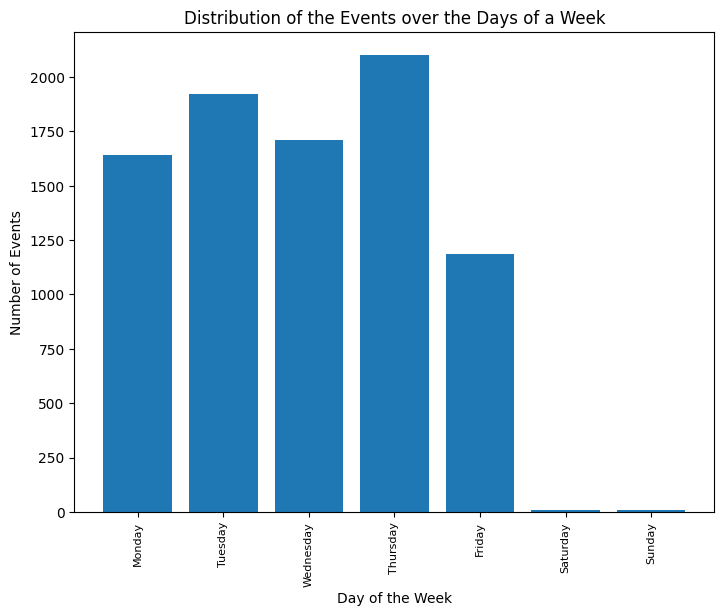

In [74]:
# Events per Day
pm4py.view_events_distribution_graph(df, distr_type="days_week") # Matplotlib inside!

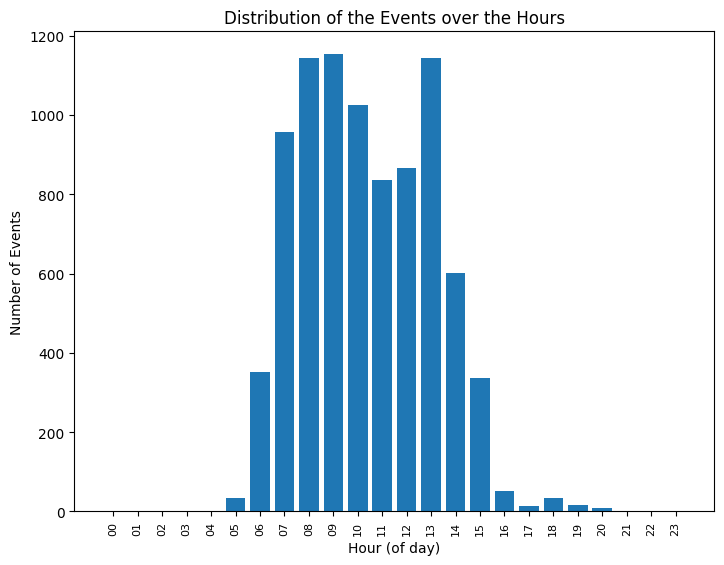

In [75]:
# Events per Hour
pm4py.view_events_distribution_graph(df, distr_type="hours") # Matplotlib inside!

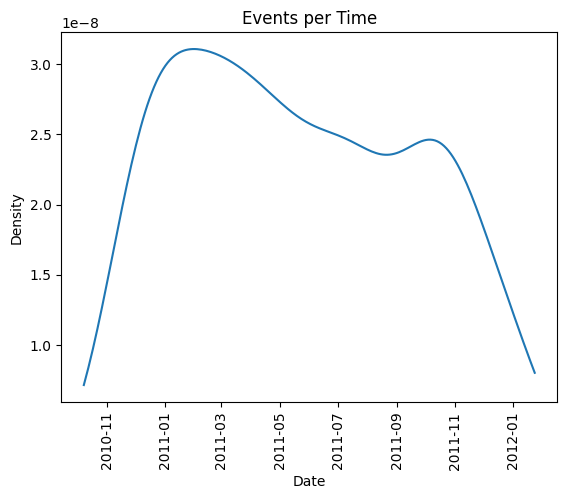

In [76]:
# Event Distribution Plot
pm4py.view_events_per_time_graph(log) # Matplotlib inside!

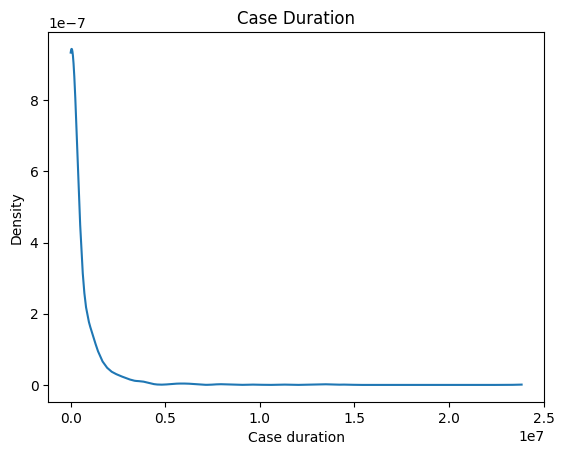

In [77]:
# Case Duration Distribution
pm4py.view_case_duration_graph(log) # Matplotlib inside!

## Fun with Process Maps (and Graphy Theory)

### Discovering Process Maps

Let $L{\in}\mathcal{B}(\Sigma^*)$ be an event log (where $\Sigma$ represents all possible activities, and $\mathcal{B}(\Sigma^*)$ represents all *multisets* over sequences of activities)

Given $a,b{\in}\Sigma$, we write $a{>_{L}}b$, iff $\exists{\sigma{\in}L}\left(\exists{1{\leq}i{<}|\sigma|}\left(\sigma(i){=}a{\wedge}\sigma(i{+}1){=}b\right)\right)$

In [78]:
dfg = pm4py.discover_dfg(df)
print(dfg[0]) # graph structure

{('Confirmation of receipt', 'T02 Check confirmation of receipt'): 1079, ('Confirmation of receipt', 'T06 Determine necessity of stop advice'): 239, ('T02 Check confirmation of receipt', 'T03 Adjust confirmation of receipt'): 43, ('T02 Check confirmation of receipt', 'T04 Determine confirmation of receipt'): 1119, ('T02 Check confirmation of receipt', 'T05 Print and send confirmation of receipt'): 1, ('T02 Check confirmation of receipt', 'T06 Determine necessity of stop advice'): 178, ('T02 Check confirmation of receipt', 'T07-1 Draft intern advice aspect 1'): 2, ('T02 Check confirmation of receipt', 'T07-2 Draft intern advice aspect 2'): 1, ('T02 Check confirmation of receipt', 'T07-5 Draft intern advice aspect 5'): 1, ('T02 Check confirmation of receipt', 'T10 Determine necessity to stop indication'): 15, ('T03 Adjust confirmation of receipt', 'T02 Check confirmation of receipt'): 51, ('T03 Adjust confirmation of receipt', 'T06 Determine necessity of stop advice'): 2, ('T04 Determine

Observe that in `pm4py`, we use: $\sum\limits_{\sigma{\in}L}L(\sigma){\cdot}|\{i{\mid}1{\leq}i{<}|\sigma|{\wedge}\sigma(i){=}a{\wedge}\sigma(i{+}1){=}b\}|$

#### Start Activities

In [79]:
print(dfg[1]) # start activities

{'Confirmation of receipt': 1434}


For the 'math lovers': $s_L(a){=}\sum\limits_{\sigma{\in}L}L(\sigma){\cdot}\begin{cases}1&if\ \sigma(1){=}a\\0&otherwise\end{cases}$

#### End Activities

In [80]:
print(dfg[2]) # end activities

{'T10 Determine necessity to stop indication': 828, 'T05 Print and send confirmation of receipt': 400, 'Confirmation of receipt': 116, 'T15 Print document X request unlicensed': 39, 'T06 Determine necessity of stop advice': 16, 'T20 Print report Y to stop indication': 15, 'T02 Check confirmation of receipt': 8, 'T11 Create document X request unlicensed': 4, 'T03 Adjust confirmation of receipt': 2, 'T04 Determine confirmation of receipt': 2, 'T07-1 Draft intern advice aspect 1': 1, 'T13 Adjust document X request unlicensed': 1, 'T07-5 Draft intern advice aspect 5': 1, 'T07-2 Draft intern advice aspect 2': 1}


$e_L(a){=}\sum\limits_{\sigma{\in}L}L(\sigma){\cdot}\begin{cases}1&if\ \sigma(|\sigma|){=}a\\0&otherwise\end{cases}$

#### Visualizing the Process Map

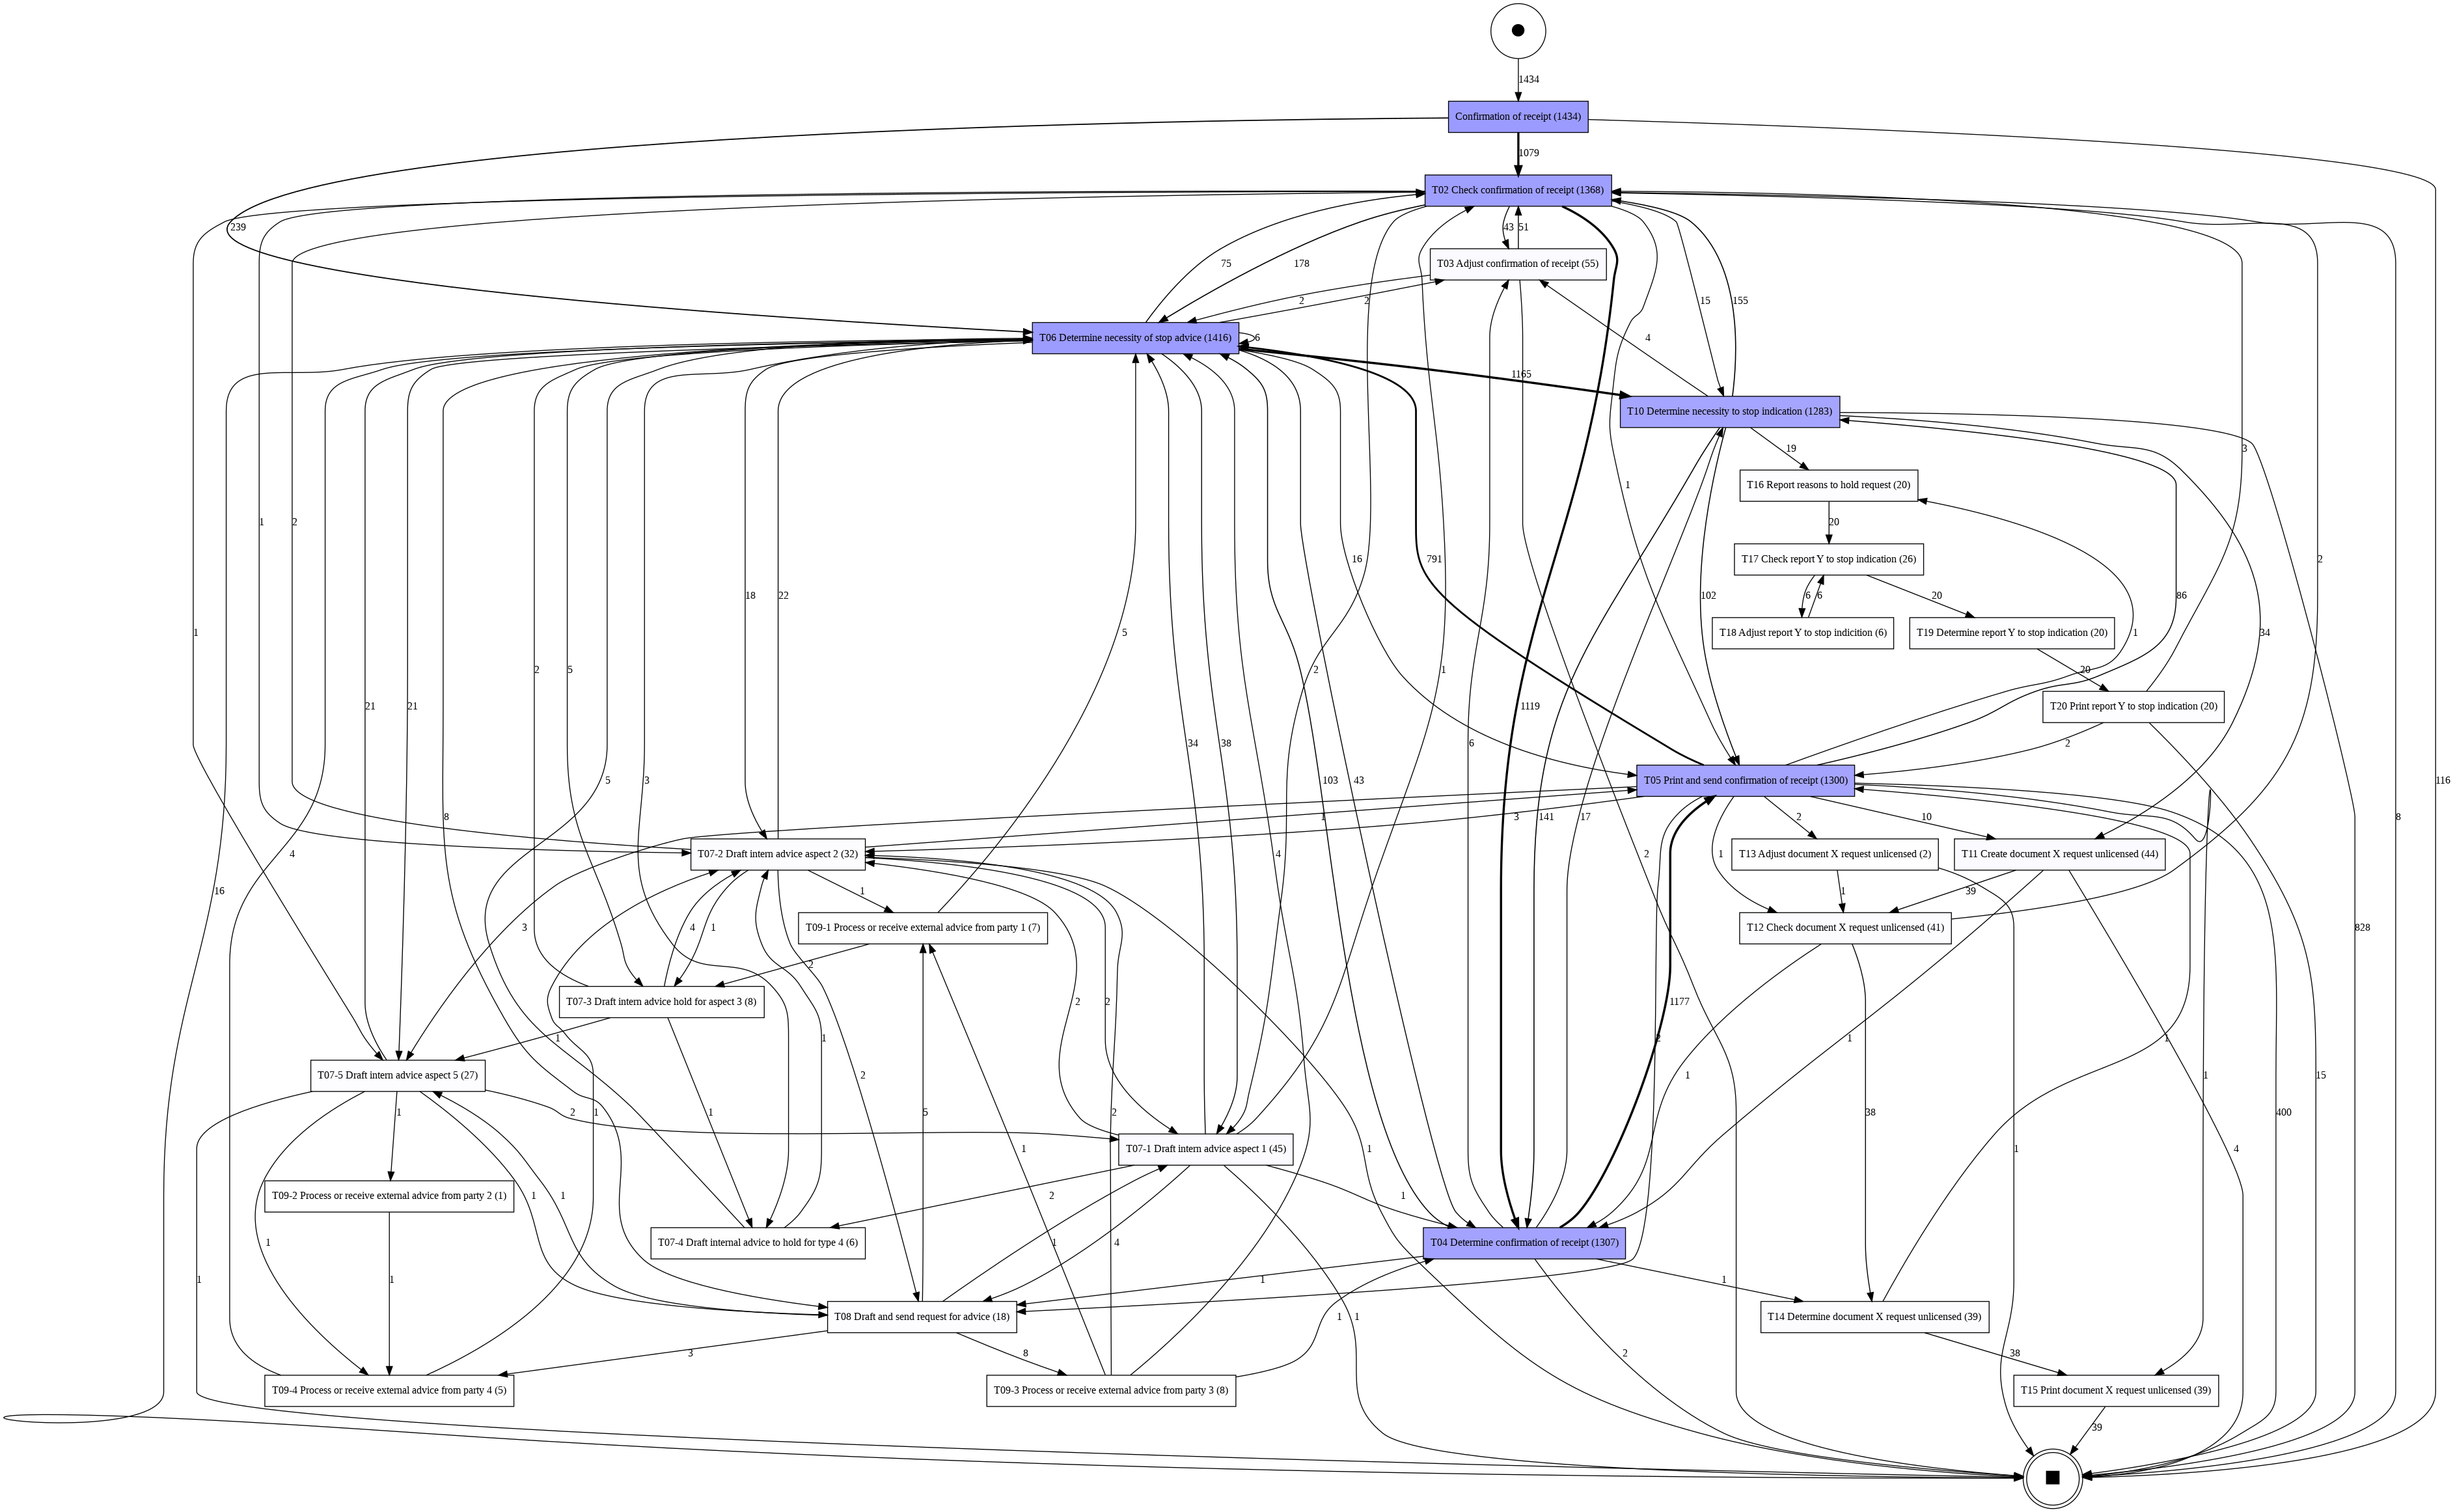

In [81]:
pm4py.view_dfg(dfg[0], dfg[1], dfg[2])

### Graph Theory for Process Maps (using NetworkX)

#### Converting the Process Map

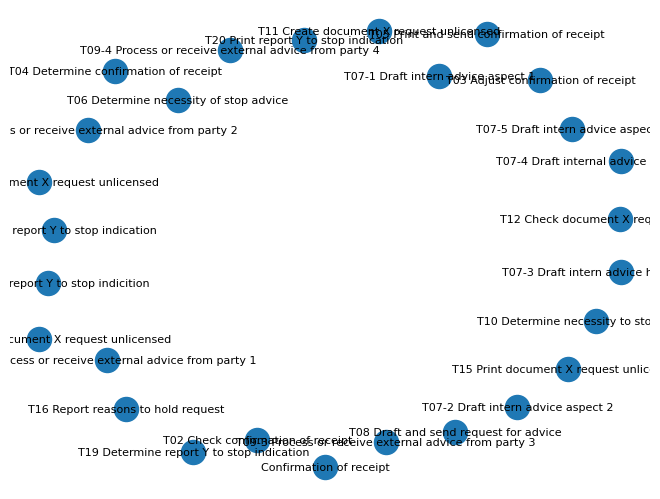

In [82]:
%matplotlib inline
import networkx as nx
import itertools as it
G = nx.DiGraph()
alphabet = set(list(it.chain.from_iterable([[a,b] for (a,b) in dfg[0]]))).union(dfg[1].keys()).union(dfg[2].keys())
G.add_nodes_from(alphabet) # adding nodes
nx.draw(G, with_labels = True, font_size =8)

#### Adding Arcs

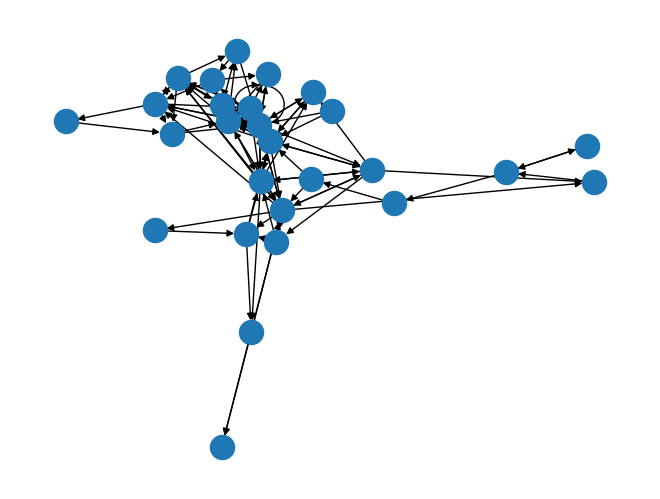

In [83]:
G.add_edges_from(dfg[0].keys())
nx.draw(G, with_labels = False, font_size =8)

### Degree of Vertices

The *indegree* of a vertex $v$, i.e., $deg^-(v)$, represents the number of *incoming arcs* of $v$ in $G$. ($deg^+(v)$ is defined symmetrically)

In [84]:
sorted([(n, i) for (n,i) in G.in_degree()], key=lambda t: t[1], reverse=True)

[('T06 Determine necessity of stop advice', 14),
 ('T07-2 Draft intern advice aspect 2', 8),
 ('T02 Check confirmation of receipt', 8),
 ('T05 Print and send confirmation of receipt', 7),
 ('T04 Determine confirmation of receipt', 7),
 ('T08 Draft and send request for advice', 6),
 ('T07-5 Draft intern advice aspect 5', 5),
 ('T07-1 Draft intern advice aspect 1', 5),
 ('T03 Adjust confirmation of receipt', 4),
 ('T10 Determine necessity to stop indication', 4),
 ('T12 Check document X request unlicensed', 3),
 ('T07-3 Draft intern advice hold for aspect 3', 3),
 ('T09-4 Process or receive external advice from party 4', 3),
 ('T09-1 Process or receive external advice from party 1', 3),
 ('T07-4 Draft internal advice to hold for type 4', 3),
 ('T16 Report reasons to hold request', 2),
 ('T11 Create document X request unlicensed', 2),
 ('T17 Check report Y to stop indication', 2),
 ('T15 Print document X request unlicensed', 2),
 ('T14 Determine document X request unlicensed', 2),
 ('T09-

### Dominator of a Graph

A vertex $d$ dominates a vertex $v$ in a graph $G$ iff every path from some given *entry node* $s$ visits $d$

In [85]:
nx.immediate_dominators(G, 'Confirmation of receipt')

{'Confirmation of receipt': 'Confirmation of receipt',
 'T02 Check confirmation of receipt': 'Confirmation of receipt',
 'T03 Adjust confirmation of receipt': 'Confirmation of receipt',
 'T06 Determine necessity of stop advice': 'Confirmation of receipt',
 'T04 Determine confirmation of receipt': 'Confirmation of receipt',
 'T05 Print and send confirmation of receipt': 'Confirmation of receipt',
 'T13 Adjust document X request unlicensed': 'T05 Print and send confirmation of receipt',
 'T10 Determine necessity to stop indication': 'Confirmation of receipt',
 'T16 Report reasons to hold request': 'Confirmation of receipt',
 'T17 Check report Y to stop indication': 'T16 Report reasons to hold request',
 'T19 Determine report Y to stop indication': 'T17 Check report Y to stop indication',
 'T20 Print report Y to stop indication': 'T19 Determine report Y to stop indication',
 'T18 Adjust report Y to stop indicition': 'T17 Check report Y to stop indication',
 'T11 Create document X request 

### Centrality of a Node

In [86]:
sorted(nx.degree_centrality(G).items(), key=lambda t: t[1], reverse=True)

[('T06 Determine necessity of stop advice', 1.0),
 ('T05 Print and send confirmation of receipt', 0.6538461538461539),
 ('T02 Check confirmation of receipt', 0.6153846153846154),
 ('T07-2 Draft intern advice aspect 2', 0.576923076923077),
 ('T04 Determine confirmation of receipt', 0.5),
 ('T08 Draft and send request for advice', 0.42307692307692313),
 ('T07-1 Draft intern advice aspect 1', 0.42307692307692313),
 ('T07-5 Draft intern advice aspect 5', 0.38461538461538464),
 ('T10 Determine necessity to stop indication', 0.38461538461538464),
 ('T07-3 Draft intern advice hold for aspect 3', 0.2692307692307693),
 ('T12 Check document X request unlicensed', 0.23076923076923078),
 ('T03 Adjust confirmation of receipt', 0.23076923076923078),
 ('T09-3 Process or receive external advice from party 3',
  0.19230769230769232),
 ('T09-4 Process or receive external advice from party 4',
  0.19230769230769232),
 ('T09-1 Process or receive external advice from party 1',
  0.19230769230769232),
 ('T0

## Discovering Process Models

### Discovering a BPMN Model (Raw Data)

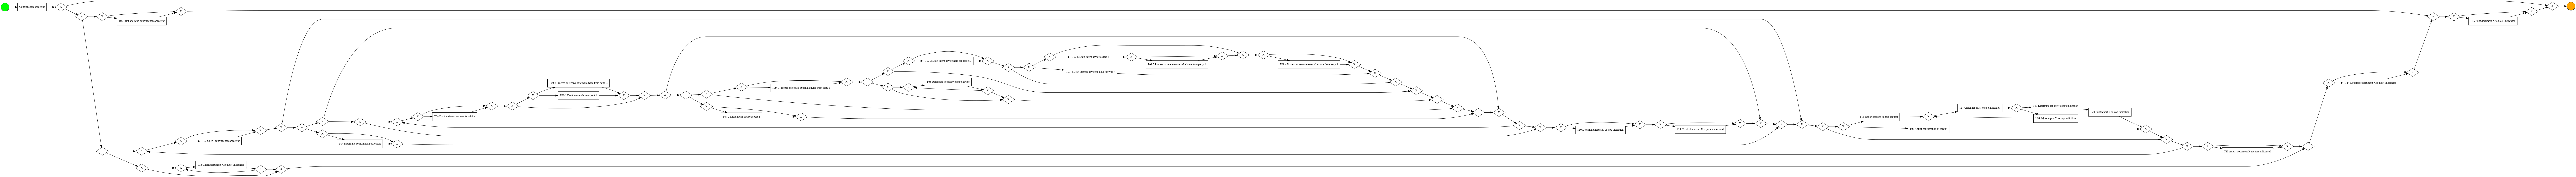

In [87]:
bpmn_1 = pm4py.discover_bpmn_inductive(df)
pm4py.view_bpmn(bpmn_1)

### Discovering a BPMN Model (Internal Filtering)

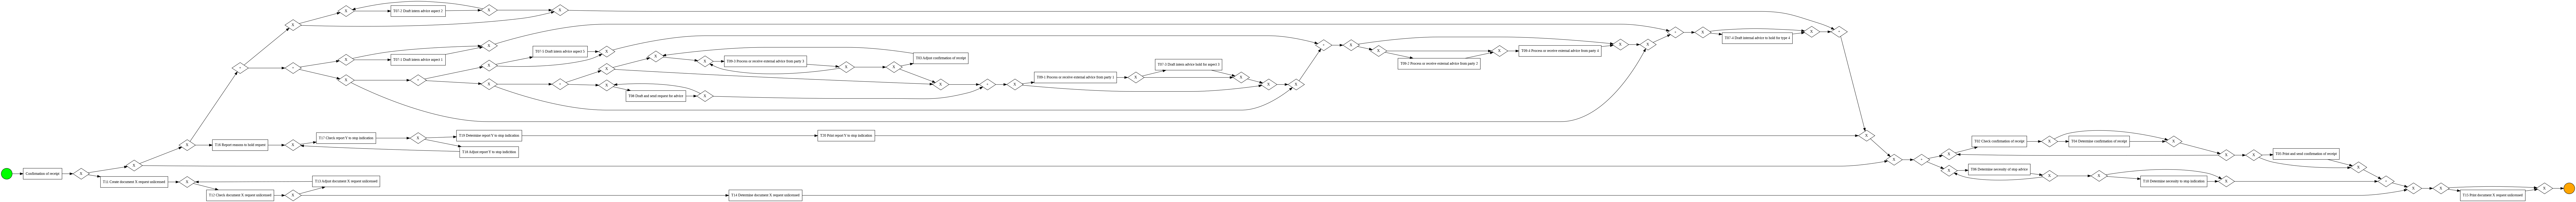

In [88]:
bpmn_2 = pm4py.discover_bpmn_inductive(df, noise_threshold=0.1)
pm4py.view_bpmn(bpmn_2)

## Checking Model Quality

### Converting the Model

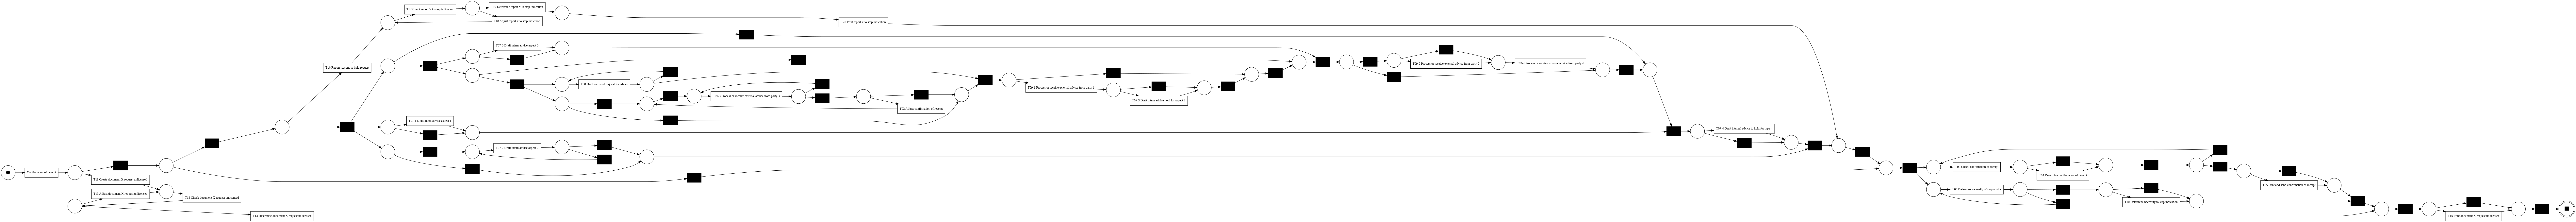

In [89]:
pn, im, fm = pm4py.convert_to_petri_net(bpmn_2)
pm4py.view_petri_net(pn, im, fm)

### Checking Behavioral Model Properties

In [90]:
pm4py.check_soundness(pn, im, fm)

/usr/local/lib/python3.10/dist-packages/pm4py/algo/analysis/woflan/place_invariants/utility.py:151: UserWarning: solution from scipy may be unstable. Please install PuLP (pip install pulp) for fully reliable results.
  warnings.warn("solution from scipy may be unstable. Please install PuLP (pip install pulp) for fully reliable results.")


(True,
 {'s_c_net': places: [ ent_id069b59d3-51e6-4af8-883e-9cb3b69eaad0, ent_id0eb9c418-dcd5-4bad-bead-a634eeb01bff, ent_id120909f1-f63d-4b64-b143-c5b59f5248a1, ent_id1b34a4f4-afa9-4ed5-84f6-5b6ca5537b05, ent_id201c4acf-7a72-4903-8624-416c504a1986, ent_id247a703e-d868-4e40-a01c-0c5ff9d6edb2, ent_id265bfdf0-e878-46f2-9e58-967045027b0f, ent_id29c7940a-7b71-4ae8-a996-9d251d2c0ee1, ent_id343e93bb-9773-4384-9c3a-842d786eef8c, ent_id37e6ac0b-0323-47e7-9196-67a55b04450a, ent_id474af273-351a-42fd-971e-3e1a41d3a4f9, ent_id5acbd835-7709-403f-95ed-25dad1f1ac9f, ent_id66d614e1-3eee-44dd-a861-04cc24bb11fd, ent_id6fa7c7e1-0a74-4927-ae91-1df1a83b123a, ent_id7fc4312e-d13b-4d54-8657-10cecbc2932d, ent_id8e0d2c48-4136-4150-969d-3d250ae21a6d, ent_ida00a42d5-e5c7-4a95-90c5-8d334deb3d93, ent_idaf4aceed-5fd7-48f8-9e38-e82f35123aed, ent_idbf8de11a-f4fe-4bf0-a0d6-f21632e60cff, ent_idc1da33d0-e8d4-4b4d-a9d6-4cb95ffb36f8, ent_idd3eca08d-11b5-4fdb-a654-3a73544e394e, ent_iddec70a1b-50ec-4e91-ba0d-8df1c5c08a50, en

Technically, the net should only be *easy sound*

Let $N{=}(P,T,F)$ be a Petri net and let $i,o{\in}\mathcal{B}(P)$ be a corresponding *initial* and *final* marking.

$(N,i)$ is *easy sound* iff $o{\in}\mathcal{R}(N,i)$ (aka, the *final marking* $o$ should be reachable from initial marking $i$)

### Computing Quality Statistics

#### Fitness

The *fitness* $f$ of an event log $L$ w.r.t. a model $M$ is the fraction of log behavior that is described by the model.

$f(L,M){=}1{\implies}$ all behavior described by the event log is also described by the model

$f(L,M){=}0{\implies}$ none of the behavior described by the event log is also described by the model

In [91]:
pm4py.fitness_token_based_replay(log, pn, im, fm) # fast results; less accurate/explainable

replaying log with TBR, completed variants ::   0%|          | 0/116 [00:00<?, ?it/s]

{'perc_fit_traces': 80.75313807531381,
 'average_trace_fitness': 0.9509325691357517,
 'log_fitness': 0.9840115394740443,
 'percentage_of_fitting_traces': 80.75313807531381}

In [92]:
pm4py.fitness_alignments(log, pn, im, fm)

aligning log, completed variants ::   0%|          | 0/116 [00:00<?, ?it/s]

{'percFitTraces': 80.75313807531381,
 'averageFitness': 0.93828352252959,
 'percentage_of_fitting_traces': 80.75313807531381,
 'average_trace_fitness': 0.93828352252959,
 'log_fitness': 0.9502740118943261}

#### Precision

The *precision* $p$ of a model $M$ w.r.t. a log $L$, is the fraction of model behavior that is also described by the log.

$p(M,L){=}1{\implies}$ all behavior described by the model is also described by the log

$p(M,L){=}0{\implies}$ none of the behavior described by the model is also described by the log

Often, when $p(M,L){\approx}0$, the model describes a lot of behavior (or $|\mathcal{L}(M)|{=}\infty$)

In [93]:
pm4py.precision_token_based_replay(log, pn, im, fm)

replaying log with TBR, completed variants ::   0%|          | 0/458 [00:00<?, ?it/s]

0.4005733252866627

In [94]:
pm4py.precision_alignments(log, pn, im, fm)

computing precision with alignments, completed variants ::   0%|          | 0/458 [00:00<?, ?it/s]

0.4005733252866627

#### Diagnostics

In [95]:
alignments = pm4py.conformance_diagnostics_alignments(log, pn, im, fm)
alignments[0]

aligning log, completed variants ::   0%|          | 0/116 [00:00<?, ?it/s]

{'alignment': [('Confirmation of receipt', 'Confirmation of receipt'),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', 'T06 Determine necessity of stop advice'),
  ('T02 Check confirmation of receipt', 'T02 Check confirmation of receipt'),
  ('T03 Adjust confirmation of receipt', '>>'),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('T02 Check confirmation of receipt', 'T02 Check confirmation of receipt'),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None)],
 'cost': 20016,
 'visited_states': 29,
 'queued_states': 79,
 'traversed_arcs': 83,
 'lp_solved': 3,
 'fitness': 0.7142857142857143,
 'bwc': 70013}

In [96]:
non_fitting = list(filter(lambda a: a['fitness']<1.0, alignments))
non_fitting[0]

{'alignment': [('Confirmation of receipt', 'Confirmation of receipt'),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', 'T06 Determine necessity of stop advice'),
  ('T02 Check confirmation of receipt', 'T02 Check confirmation of receipt'),
  ('T03 Adjust confirmation of receipt', '>>'),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('T02 Check confirmation of receipt', 'T02 Check confirmation of receipt'),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None)],
 'cost': 20016,
 'visited_states': 29,
 'queued_states': 79,
 'traversed_arcs': 83,
 'lp_solved': 3,
 'fitness': 0.7142857142857143,
 'bwc': 70013}

### Comparing Footprints

Recall: $a{>_{L}}b$, iff $\exists{\sigma{\in}L}\left(\exists{1{\leq}i{<}|\sigma|}\left(\sigma(i){=}a{\wedge}\sigma(i{+}1){=}b\right)\right)$

We let $a{\to_L}b$ iff $a{>_L}b$ and $b{\not>_L}a$, we let $a{\#}b$ iff $a{\not>_L}b$ and $b{\not>_L}a$, and, we let $a{||_L}b$ iff $a{>_L}b$ and $b{>_L}a$

We can do the same thing for the model: assume $\mathcal{L}(M){\subseteq}\Sigma^*$ represents the language of some model $M$.

We let $a{>_{M}}b$, iff $\exists{\sigma{\in}\mathcal{L}(M)}\left(\exists{1{\leq}i{<}|\sigma|}\left(\sigma(i){=}a{\wedge}\sigma(i{+}1){=}b\right)\right)$

Then, $a{\to_M}b$, $a{\#_L}b$, and $a{||_L}b$ are defined analogously

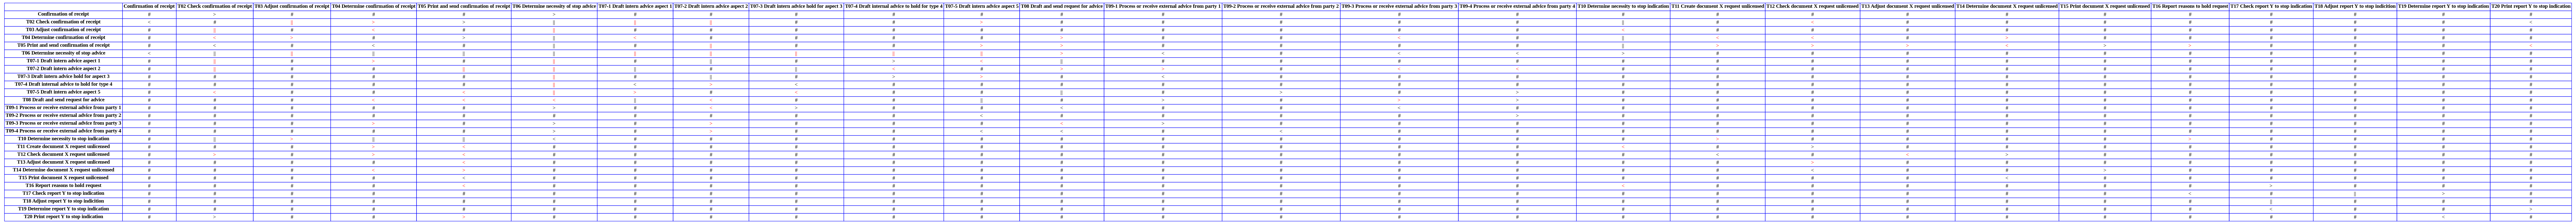

In [101]:
from pm4py.algo.discovery.footprints import algorithm as footprints_discovery
process_tree = pm4py.discover_process_tree_inductive(df, noise_threshold=0.1)
fp_log = footprints_discovery.apply(log, variant=footprints_discovery.Variants.ENTIRE_EVENT_LOG)
fp_model = footprints_discovery.apply(process_tree, variant=footprints_discovery.Variants.PROCESS_TREE)
from pm4py.visualization.footprints import visualizer as fp_visualizer
gviz = fp_visualizer.apply(fp_log, fp_model)
fp_visualizer.view(gviz)

## Classification and Prediction

### Machine Learning at the Case Level

#### Attribute Inspection

In [102]:
pm4py.get_event_attributes(df)

['org:group',
 'concept:instance',
 'org:resource',
 'concept:name',
 'time:timestamp',
 'lifecycle:transition',
 'case:startdate',
 'case:responsible',
 'case:enddate_planned',
 'case:department',
 'case:group',
 'case:concept:name',
 'case:deadline',
 'case:channel',
 'case:enddate',
 'start_timestamp']

In [103]:
pm4py.get_trace_attributes(df)

['case:startdate',
 'case:responsible',
 'case:enddate_planned',
 'case:department',
 'case:group',
 'case:concept:name',
 'case:deadline',
 'case:channel',
 'case:enddate']

#### Creating a Feature Table

In [104]:
from pm4py.algo.transformation.log_to_features import algorithm as log_to_features
ft, feature_names = log_to_features.apply(log, parameters={"str_ev_attr": ["concept:name", "org:resource"],
                                                "str_tr_attr": ["case:channel", "case:responsible", "case:group", "case:department"],
                                                "num_ev_attr": [], "num_tr_attr": [],
                                                "str_evsucc_attr": ["concept:name", "org:resource"]})
pd.DataFrame(ft, columns=feature_names)

trace:case:channel@UNDEFINED  trace:case:responsible@UNDEFINED  \
0                                1                                 1   
1                                1                                 1   
2                                1                                 1   
3                                1                                 1   
4                                1                                 1   
...                            ...                               ...   
1429                             1                                 1   
1430                             1                                 1   
1431                             1                                 1   
1432                             1                                 1   
1433                             1                                 1   

      trace:case:group@UNDEFINED  trace:case:department@UNDEFINED  \
0                              1                                1   
1                              1                                1   
2                              1                                1   
3                              1                                1   
4                              1                                1   
...                          ...                              ...   
1429                           1                                1   
1430                           1                                1   
1431                           1                                1   
1432                           1                                1   
1433                           1                                1   

      event:concept:name@Confirmation of receipt  \
0                                              1   
1                                              1   
2                                              1   
3                                              1   
4                                              1   
...                                          ...   
1429                                           1   
1430                                           1   
1431                                           1   
1432                                           1   
1433                                           1   

      event:concept:name@T02 Check confirmation of receipt  \
0                                                     1      
1                                                     1      
2                                                     1      
3                                                     1      
4                                                     1      
...                                                 ...      
1429                                                  1      
1430                                                  1      
1431                                                  1      
1432                                                  1      
1433                                                  1      

      event:concept:name@T03 Adjust confirmation of receipt  \
0                                                     1       
1                                                     1       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
1429                                                  0       
1430                                                  0       
1431                                                  0       
1432                                                  0       
1433                                                  0       

      event:concept:name@T04 Determine confirmation of receipt  \
0                                                     0          
1                                                    

#### Principal Component Analysis

In [105]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca_df = pd.DataFrame(pca.fit_transform(ft))
pca_df.rename({c: str(c) for c in pca_df.columns}, axis='columns') # renaming the columns to string
pca_df

0         1         2         3         4
0     1.708022 -0.098254  0.510535 -0.202264 -0.087365
1     1.864585  0.224361 -0.652591  0.290627  0.360869
2    -0.587899 -0.536822 -0.071235 -0.350344 -0.073516
3    -0.587899 -0.536822 -0.071235 -0.350344 -0.073516
4    -0.630247 -0.552486 -0.177917 -0.421202 -0.000576
...        ...       ...       ...       ...       ...
1429 -0.587899 -0.536822 -0.071235 -0.350344 -0.073516
1430 -0.587899 -0.536822 -0.071235 -0.350344 -0.073516
1431 -0.587899 -0.536822 -0.071235 -0.350344 -0.073516
1432 -0.546977 -0.470138 -0.076285 -0.281206 -0.064705
1433 -0.564049 -0.462928 -0.057466 -0.352730  0.008028

[1434 rows x 5 columns]

#### Outlier Detection

In [106]:
from sklearn.ensemble import IsolationForest
model=IsolationForest()
model.fit(pca_df)
pca_df["scores"] = model.decision_function(pca_df)
pca_df.sort_values("scores")

0         1         2         3         4    scores
376   0.774241  1.010678 -0.724180 -0.409933  1.216155 -0.142348
460   0.655304  1.002601  1.292758 -0.207110  0.838468 -0.114094
357   0.743008  0.913848 -0.838748 -0.024340  1.182263 -0.113016
1126  2.108918 -0.022719 -0.551558  0.251429  0.278473 -0.111552
733   0.697046  0.743312  1.165517 -0.089496  1.301435 -0.111362
...        ...       ...       ...       ...       ...       ...
9    -0.540384 -0.461445 -0.047206 -0.283437 -0.054041  0.146266
1151 -0.540384 -0.461445 -0.047206 -0.283437 -0.054041  0.146266
993  -0.540384 -0.461445 -0.047206 -0.283437 -0.054041  0.146266
53   -0.540384 -0.461445 -0.047206 -0.283437 -0.054041  0.146266
1180 -0.540384 -0.461445 -0.047206 -0.283437 -0.054041  0.146266

[1434 rows x 6 columns]

#### Concept Drift Detection

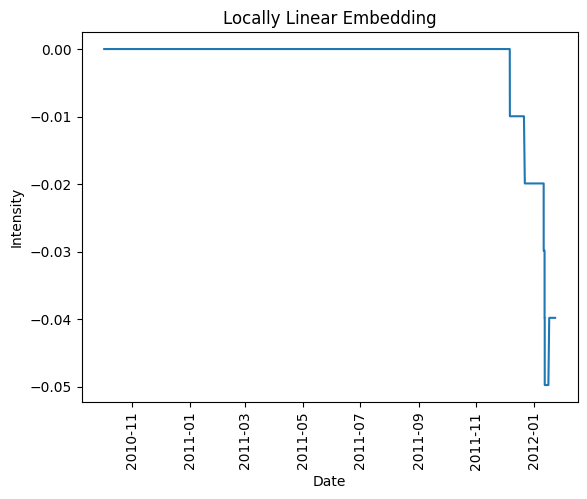

In [107]:
from pm4py.algo.transformation.log_to_features.util import locally_linear_embedding
from pm4py.visualization.graphs import visualizer

x, y = locally_linear_embedding.apply(df)
gviz = visualizer.apply(x, y, variant=visualizer.Variants.DATES, parameters={"title": "Locally Linear Embedding", "y_axis": "Intensity"})
visualizer.view(gviz)

#### Clustering

In [108]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=4)
# a number from "0" (first cluster) to "3" (last cluster) will be associated to every case of the log
clustering.fit_predict(ft)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, ..., 0, 0, 0], dtype=int32)

#### Case Duration Prediction

In [117]:
data, feature_names = log_to_features.apply(log, parameters={"str_tr_attr": ["channel", "group", "responsible", "department"], "str_ev_attr": [], "num_tr_attr": [], "num_ev_attr": [], "str_evsucc_attr": []})
throughput_time = [y[-1]["time:timestamp"].timestamp() - y[0]["time:timestamp"].timestamp() for y in log]
throughput_time[0:5]

[3811896.2769999504,
 617.9240000247955,
 239.11499977111816,
 84.51800012588501,
 720.2450001239777]

In [118]:
import random
training_cases = set(random.sample([i for i in range(len(log))], 500))
data_training = [data[i] for i in range(len(log)) if i in training_cases]
throughput_time_training = [throughput_time[i] for i in range(len(log)) if i in training_cases]

In [119]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=3)
regressor.fit(data_training, throughput_time_training)

KNeighborsRegressor(n_neighbors=3)

In [120]:
data_validation = [data[i] for i in range(len(log)) if i not in training_cases]
throughput_time_validation = [throughput_time[i] for i in range(len(log)) if i not in training_cases]

In [121]:
predicted_throughput_time = regressor.predict(data_validation)

In [122]:
for i in range(5):
    print("case actual throughput=", throughput_time_validation[i], " predicted throughput = ", predicted_throughput_time[i])

case actual throughput= 3811896.2769999504  predicted throughput =  167861.6586666902
case actual throughput= 84.51800012588501  predicted throughput =  353.7753332455953
case actual throughput= 0.0  predicted throughput =  0.0
case actual throughput= 1820.9820001125336  predicted throughput =  249.97800000508627
case actual throughput= 794.6599998474121  predicted throughput =  2099259.8053332963


![](img/pm_generic.png)